# Credit Card Users Churn Prediction 

## Description

### Background
The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

## Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank



## Data Dictionary:

1. CLIENTNUM: Client number. Unique identifier for the customer holding the account
2. Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
3. Customer age: Age in Years
4. Gender: Gender of the account holder
5. Dependent_count: Number of dependents
6. Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
7. Marital_Status: Marital Status of the account holder
8. Income_Category: Annual Income Category of the account holder
9. Card_Category: Type of Card
10. Months_on_book: Period of relationship with the bank
11. Total_Relationship_Count: Total no. of products held by the customer
12. Months_Inactive_12_mon: No. of months inactive in the last 12 months
13. Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
14. Credit_Limit: Credit Limit on the Credit Card
15. Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
16. Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
17. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
18. Total_Trans_Ct: Total Transaction Count (Last 12 months)
19. Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
20. Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
21. Avg_Utilization_Ratio: Represents how much of the available credit the customer spent
 

## Import Libraries

In [1]:
conda install -c conda-forge xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier

## Loading the dataset

In [4]:
# Loading the dataset
data = pd.read_csv("BankChurners.csv")

In [5]:
data1= data.copy()

In [6]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Observation
1. The variables are cut across Objects, Integers and Floats

In [8]:
# Data shape
data.shape

(10127, 21)

## Number of Unique values

In [9]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [10]:
#Dropping CLIENTNUM column
data.drop(columns='CLIENTNUM',inplace=True)

### Observation.
1. CLIENTNUM is not relevant to the model building

In [11]:
# fixing the names of columns as there are dots, spaces  in columns names
data.columns =[col.replace(' ','_') for col in data.columns]
data.columns =[col.replace('-','_') for col in data.columns]
data.columns =[col.replace('.','') for col in data.columns]

## Converting the data type of categorical features to category

In [12]:
## Converting the data type of categorical features to 'category'
data_cols = ['Attrition_Flag','Education_Level','Gender', 'Dependent_count', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
data[data_cols] = data[data_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [13]:
#Making a list of all catrgorical variables 
cat_col=['Education_Level','Gender', 'Dependent_count', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
---------------------------------

## Summary of the data

In [14]:
data.describe(include = 'all').T

count unique                top  freq      mean  \
Attrition_Flag            10127      2  Existing Customer  8500       NaN   
Customer_Age              10127    NaN                NaN   NaN    46.326   
Gender                    10127      2                  F  5358       NaN   
Dependent_count           10127      6                  3  2732       NaN   
Education_Level           10127      7           Graduate  3128       NaN   
Marital_Status            10127      4            Married  4687       NaN   
Income_Category           10127      6     Less than $40K  3561       NaN   
Card_Category             10127      4               Blue  9436       NaN   
Months_on_book            10127    NaN                NaN   NaN   35.9284   
Total_Relationship_Count  10127      6                  3  2305       NaN   
Months_Inactive_12_mon    10127      7                  3  3846       NaN   
Contacts_Count_12_mon     10127      7                  3  3380       NaN   
Credit_Limit              10127    NaN                NaN   NaN   8631.95   
Total_Revolving_Bal       10127    NaN                NaN   NaN   1162.81   
Avg_Open_To_Buy           10127    NaN                NaN   NaN   7469.14   
Total_Amt_Chng_Q4_Q1      10127    NaN                NaN   NaN  0.759941   
Total_Trans_Amt           10127    NaN                NaN   NaN   4404.09   
Total_Trans_Ct            10127    NaN                NaN   NaN   64.8587   
Total_Ct_Chng_Q4_Q1       10127    NaN                NaN   NaN  0.712222   
Avg_Utilization_Ratio     10127    NaN                NaN   NaN  0.274894   

                               std     min     25%    50%      75%    max  
Attrition_Flag                 NaN     NaN     NaN    NaN      NaN    NaN  
Customer_Age               8.01681      26      41     46       52     73  
Gender                         NaN     NaN     NaN    NaN      NaN    NaN  
Dependent_count                NaN     NaN     NaN    NaN      NaN    NaN  
Education_Level                NaN     NaN     NaN    NaN      NaN    NaN  
Marital_Status                 NaN     NaN     NaN    NaN      NaN    NaN  
Income_Category                NaN     NaN     NaN    NaN      NaN    NaN  
Card_Category                  NaN     NaN     NaN    NaN      NaN    NaN  
Months_on_book             7.98642      13      31     36       40     56  
Total_Relationship_Count       NaN     NaN     NaN    NaN      NaN    NaN  
Months_Inactive_12_mon         NaN     NaN     NaN    NaN      NaN    NaN  
Contacts_Count_12_mon          NaN     NaN     NaN    NaN      NaN    NaN  
Credit_Limit               9088.78  1438.3    2555   4549  11067.5  34516  
Total_Revolving_Bal        814.987       0     359   1276     1784   2517  
Avg_Open_To_Buy            9090.69       3  1324.5   3474     9859  34516  
Total_Amt_Chng_Q4_Q1      0.219207       0   0.631  0.736    0.859  3.397  
Total_Trans_Amt            3397.13     510  2155.5   3899     4741  18484  
Total_Trans_Ct             23.4726      10      45     67       81    139  
Total_Ct_Chng_Q4_Q1       0.238086       0   0.582  0.702    0.818  3.714  
Avg_Utilization_Ratio     0.275691       0   0.023  0.176    0.503  0.999

### Observation.
1. Attrition_Flag: Existing Customer has the highest count of 850.
2. Customer_Age: Average customer age is 46 year old.
3. Gender: Female are the highest number of customers than male.
4. Dependent_count: Customers with 3 dependant are the highest.
5. Education_Level: Graduates have the highest number of customers in the bank.
6. Marital_Status: Married couples have own more accounts in the bank.
7. Income_Category: Customers who earn more Less than $40K have the highest number of accounts.
8. Card_Category: Blue card holders has had a 3 relationship with the bank.
10. The average customer has 35 months on the bank books.
11. A customer has a average of 3 bank products.
12. 3 months is the highest number of inactive accounts.
13. More customers contacted customer care in 3 months
14. The average credit limit of customers is 8,631.95, and a maximum of 34,516
15. Customers revolve an average balance of 1162 to the next month in their account.
19. The average amount left on on credit cards is 7,469.14 and a maximum of 34,516.
20. The 1st quater and 4th quater average ratio of the transaction amount to count is 0.76.
21. Average Total Transaction Amount is 4,404, the data is rightly skwed. 
22. Average Total Transaction Count is 65 and a max of 139. the variable has a normal distribution.
23. The 1st quater and 4th quater average ratio of the transaction amount is 0.71.
24. The distribution of average utilization ratio is rigthly skewed with a mean of 0.27 and a maximum of 0.99

## Univariance Analysis

In [14]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,15), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [15]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

## Attrition_Flag

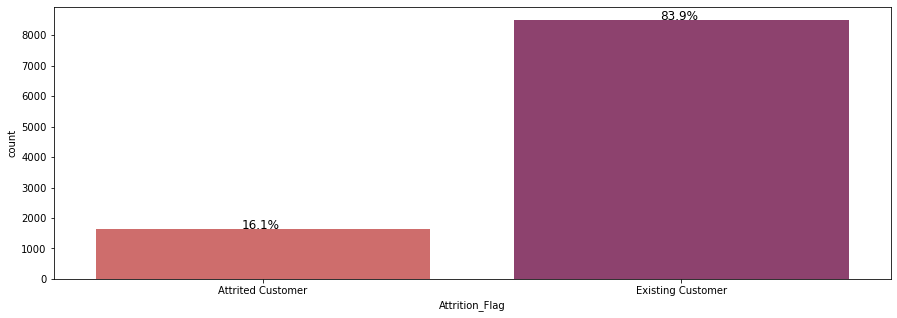

In [16]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Attrition_Flag"],palette='flare')
perc_on_bar(ax,data["Attrition_Flag"])

### OBSERVATION
1. 84% customers account are still open which are Existing Customers.
2. 16% of customers accounts are closed which means are Attrited Customers.

## Customer_Age

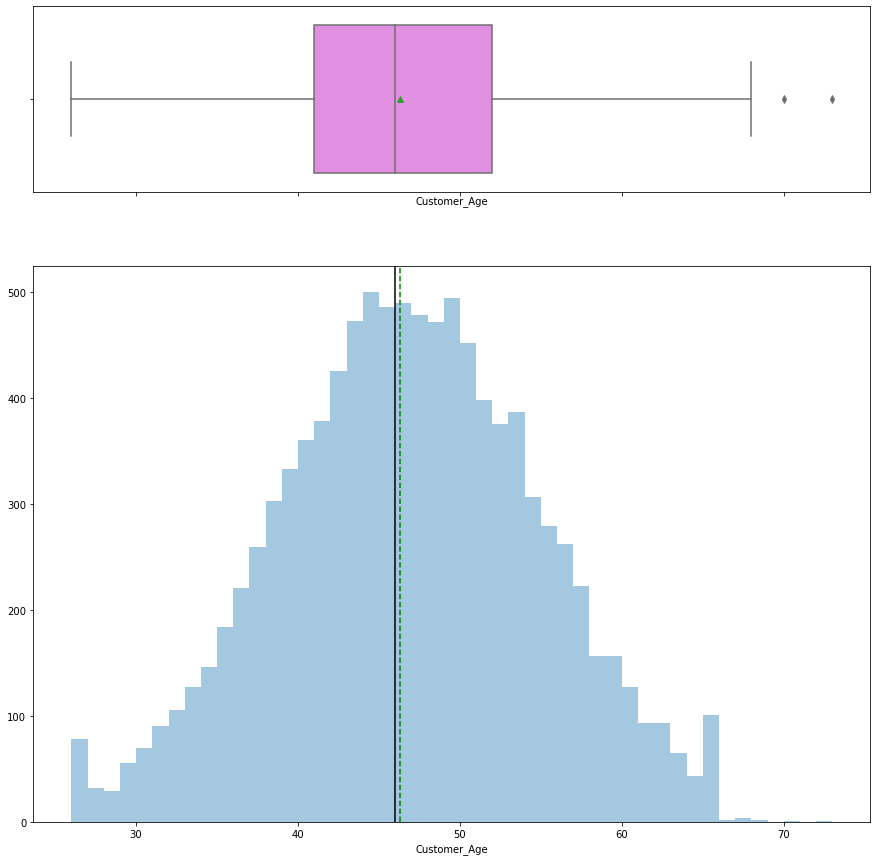

In [17]:
histogram_boxplot(data["Customer_Age"])

### OBSERVATION
1. The age distribution has a normal distribution.
2. The average age of the banks customers is 46 years old.
3. There are few outliers who are 65 and above in age.

## Gender

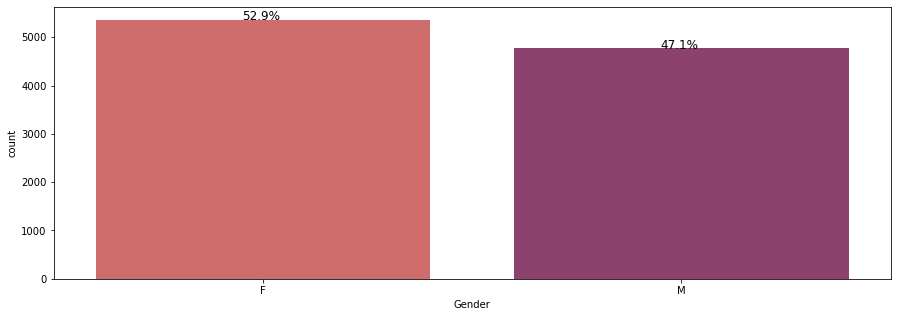

In [18]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Gender"],palette='flare')
perc_on_bar(ax,data["Gender"])

### Observation
1. Thers is a slight difference of 6% in the amount of Female and Male

## Dependent_count

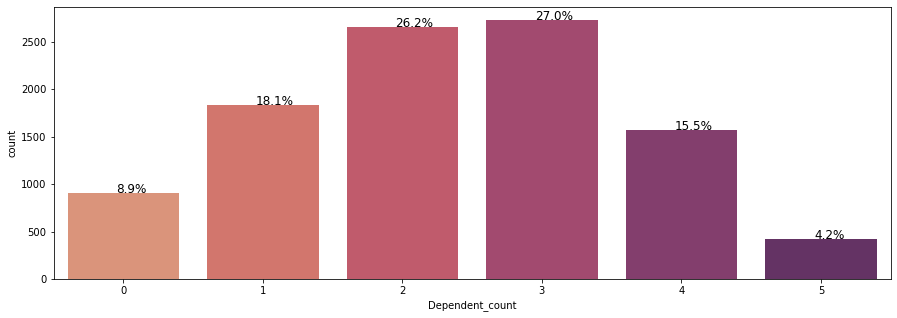

In [19]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Dependent_count"],palette='flare')
perc_on_bar(ax,data["Dependent_count"])

### Observation
1. Customers with 2 and 3 dependents are the highest number od customers.
2. Customers with 5 dependents have the least number of customers.

## Education_Level

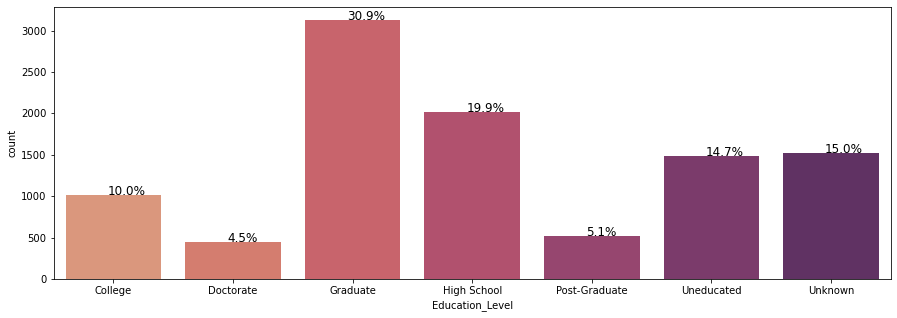

In [20]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Education_Level"],palette='flare')
perc_on_bar(ax,data["Education_Level"])

### Observation
1. Graduates cover 31% of the customers amoung other 6 educational category levels.
2. Customers with Doctorate and Post Graduate have an average 5%, the least amount of customers.
3. High school, Undecated make a consierable number of customer of 20% and 15% respectively

## Marital_Status

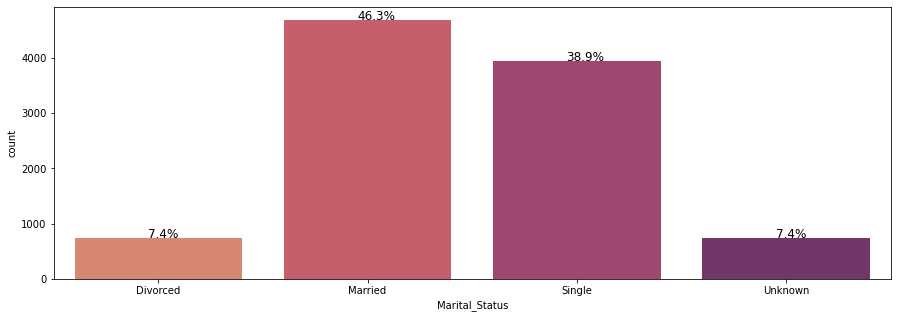

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Marital_Status"],palette='flare')
perc_on_bar(ax,data["Marital_Status"])

### Observation
1. Most customer of the bank are married accounting for 46% of the total customers
2. Single Customers have a good count of 39% of the customer base
3. Divorced couples are the lease amount of customers amounting to 7%

## Income_Category

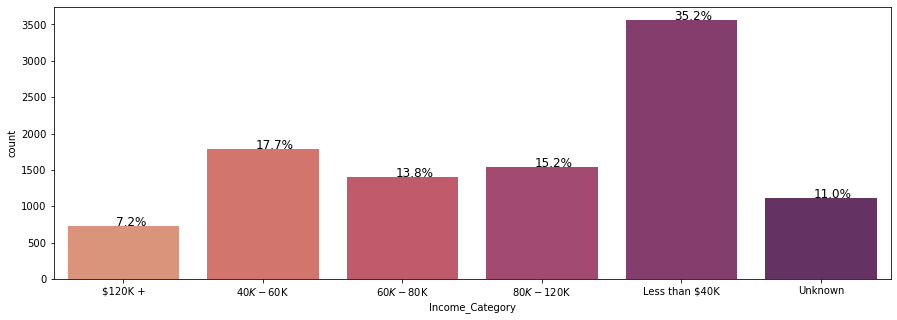

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Income_Category"],palette='flare')
perc_on_bar(ax,data["Income_Category"])

### Observation
1.  Majority of the bank customers which is 35% earn less than 40k.
2.  Customers who earn between 40k and 120k are the next highest catergory of customers who bank with Thera Bank.
3.  Customers who earn above 120k are minimal.

## Card_Category

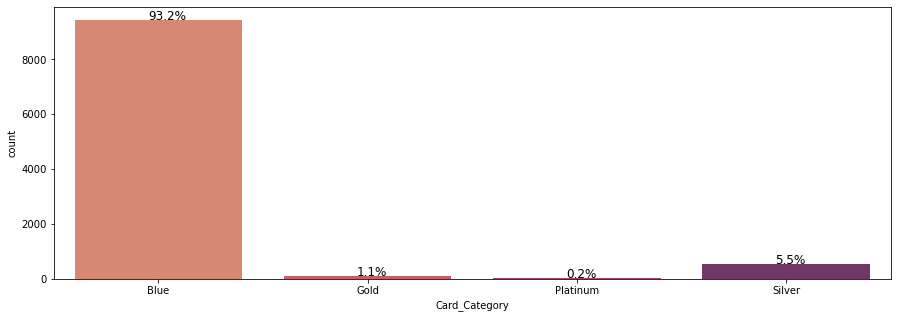

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Card_Category"],palette='flare')
perc_on_bar(ax,data["Card_Category"])

### Observation. 
1. 93% of the banks customers have only blue credit card category.
2. 7% of the banks customers have Gold, Platinum and Silver.
3. Further investigation should be carried out to know why other cards arent being patronized.

## Months_on_book

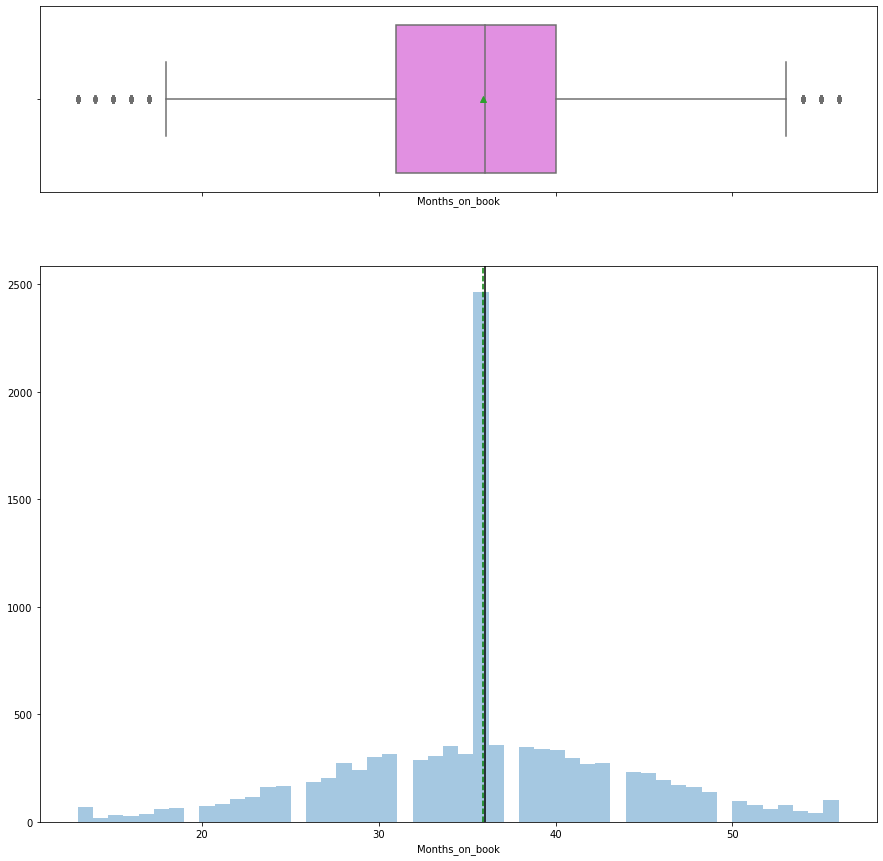

In [24]:
histogram_boxplot(data["Months_on_book"])   

### Observation
1. Most customer have 36months (3years) on banking with the bank.
2. There is a sharp decline after 3 years of banking which should be investigated why there is no continous increase after 3 years of banking

## Total_Relationship_Count

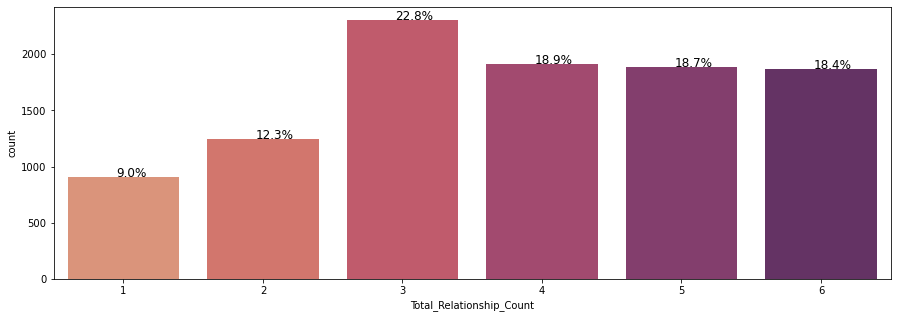

In [25]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Total_Relationship_Count"],palette='flare')
perc_on_bar(ax,data["Total_Relationship_Count"])

### Observation.
1. Most cutomers have more than 3 products with the bank.
2. There is a consistent count of 18% cut across 4, 5 & 6 products held by customers.
3. The highest number of product held is 3 which amounts to 23% of the bank customer base

## Months_Inactive_12_mon

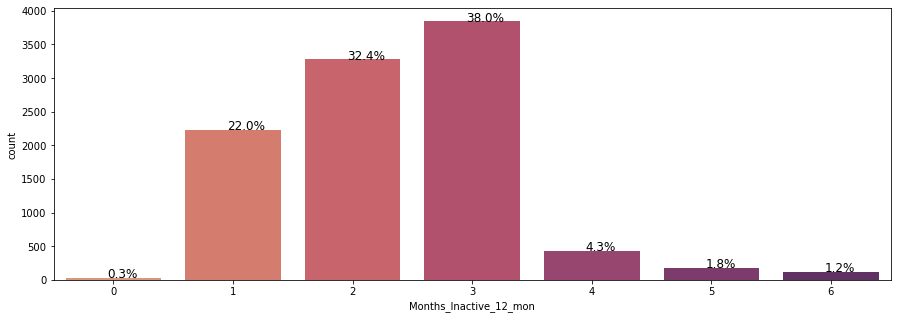

In [26]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Months_Inactive_12_mon"],palette='flare')
perc_on_bar(ax,data["Months_Inactive_12_mon"])

### Observation
1. The highest number of months a customers account is inactive is between 1-3months
2. 0.3% of the customers leave their account inactive.

## Contacts_Count_12_mon

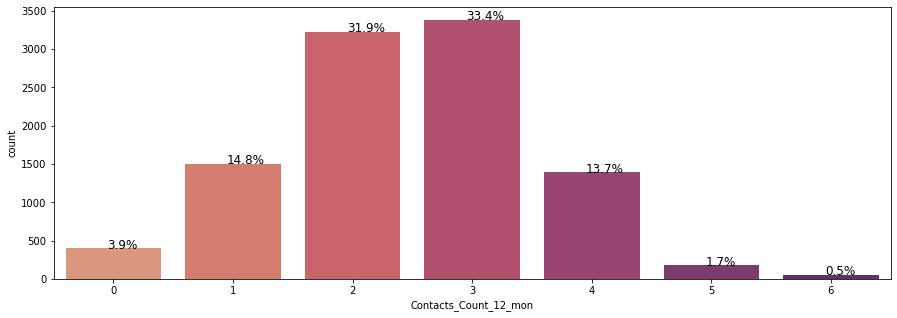

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Contacts_Count_12_mon"],palette='flare')
perc_on_bar(ax,data["Contacts_Count_12_mon"])

### Observation
1. 33% and 32% of customers come to the bank 3-2 times respectively in 12 months.
2. More than 60% most come to the bank customers made contact with the bank 
2. 4% of the customers didnt have any contact with the bank in 12 months

## Credit_Limit

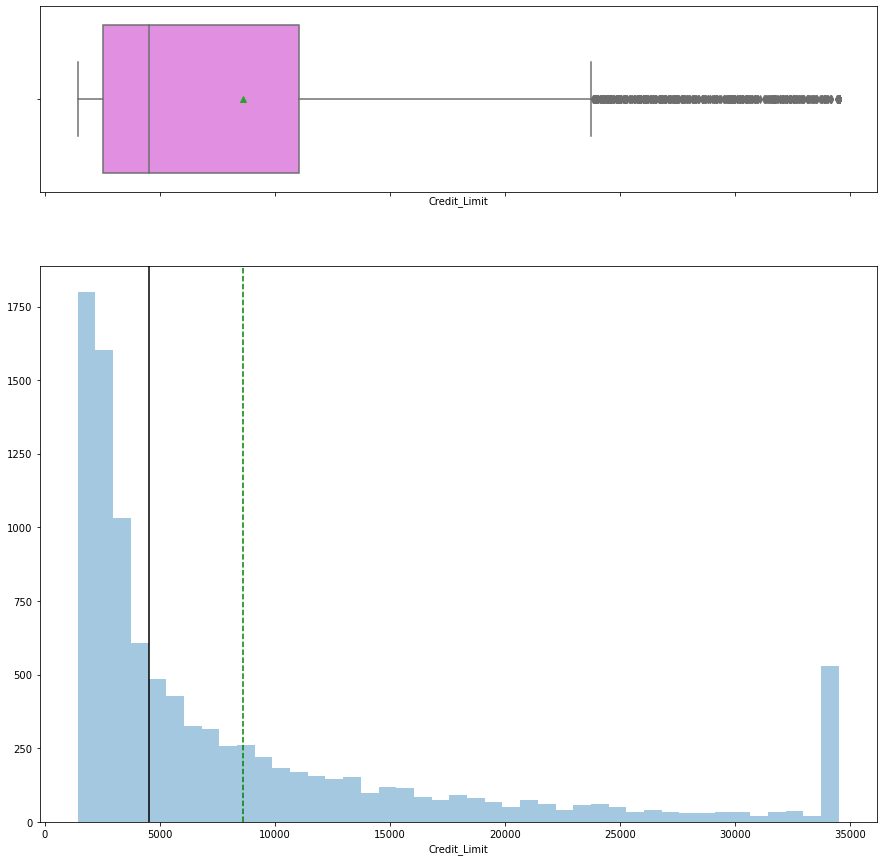

In [28]:
histogram_boxplot(data["Credit_Limit"]) 

### Observation
1. The Average bank customers have a credit limit of 8600.
2. The median credit limit is 4800.
3. There are outliers who have a credit limit above 24,000.

## Total_Revolving_Bal

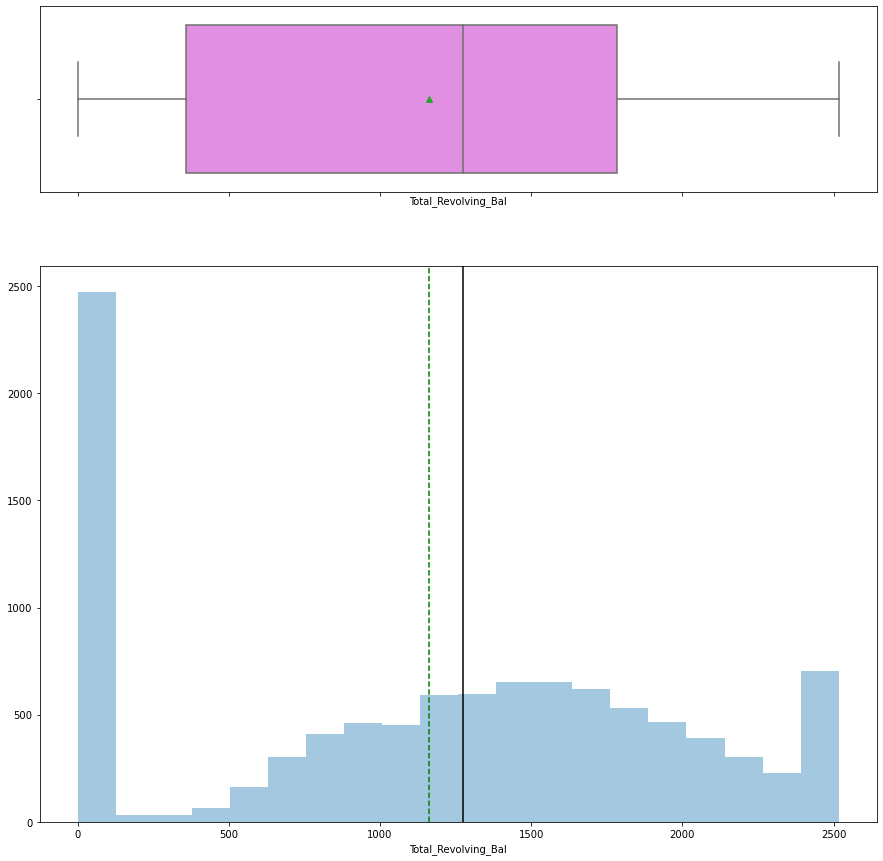

In [29]:
histogram_boxplot(data["Total_Revolving_Bal"])   

### Observation:
1. A high count of customers to not leave revolving balance into the next month in the account.
2. The Average customer leaves 1200 in their account revovling into next month.

## Avg_Open_To_Buy

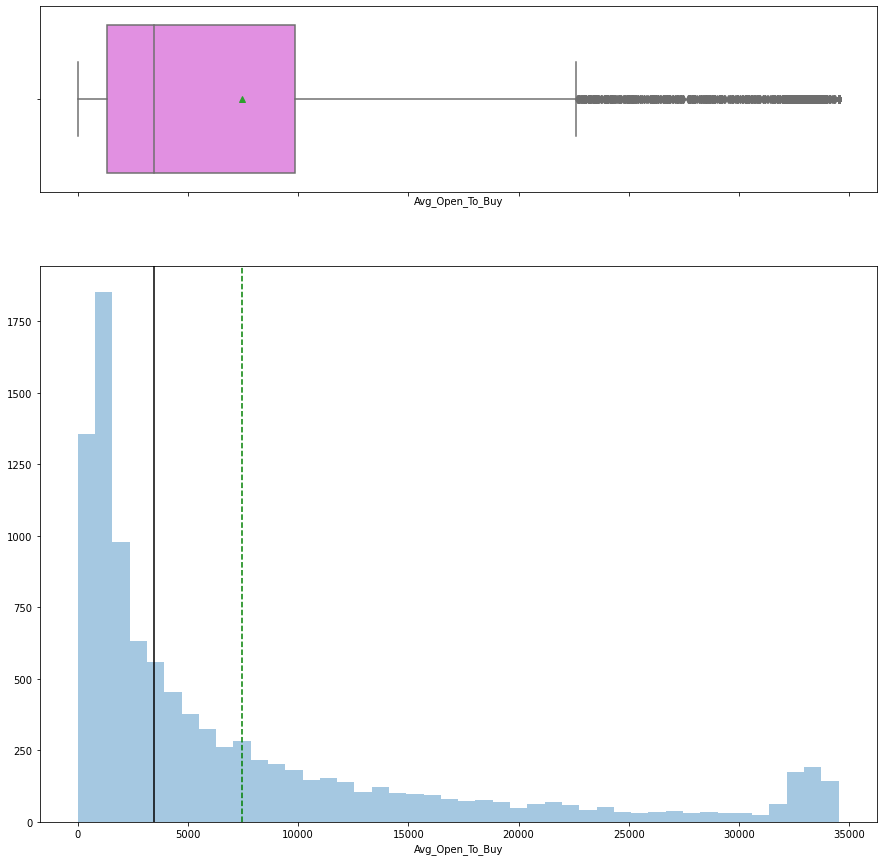

In [30]:
histogram_boxplot(data["Avg_Open_To_Buy"])   

### Observation
1. The Median amount being open to buy is 3000.
2. The Average amount being open to buy is 7,500.
3. There are outlier from above 21,000 who are open to by in an average of 12months.

## Total_Amt_Chng_Q4_Q1

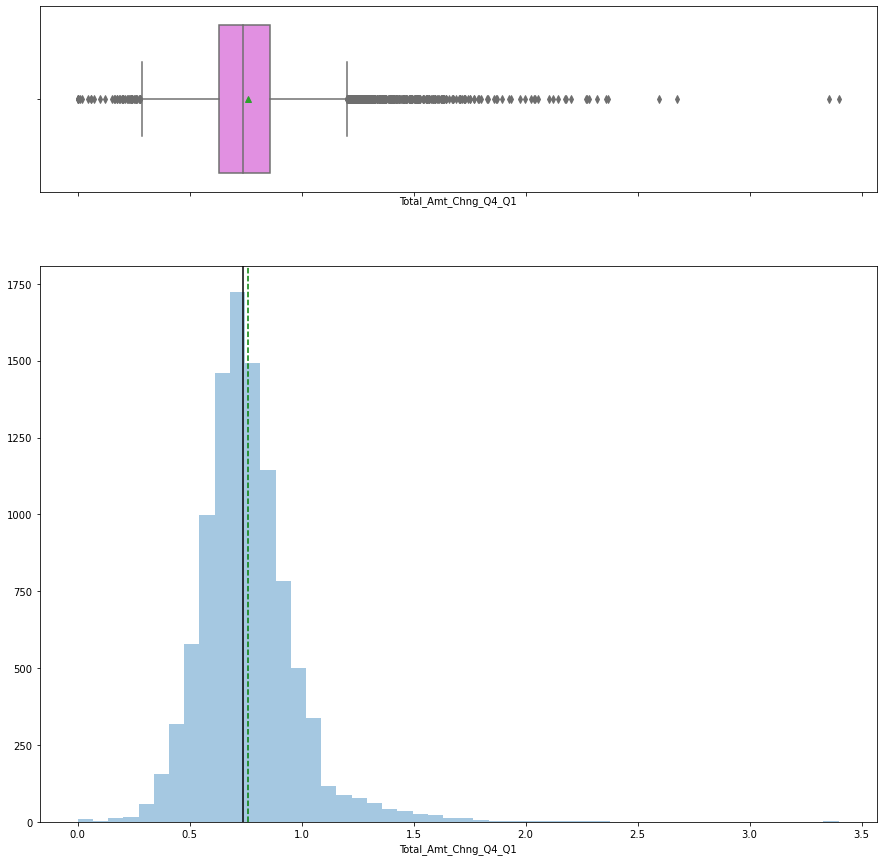

In [31]:
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])

### Observation
1. Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter has normal distributed.
2. The Average ratio is 0.75 of the transaction amount in 4th quarter and the total transaction amount in 1st quarter.

## Total_Trans_Amt

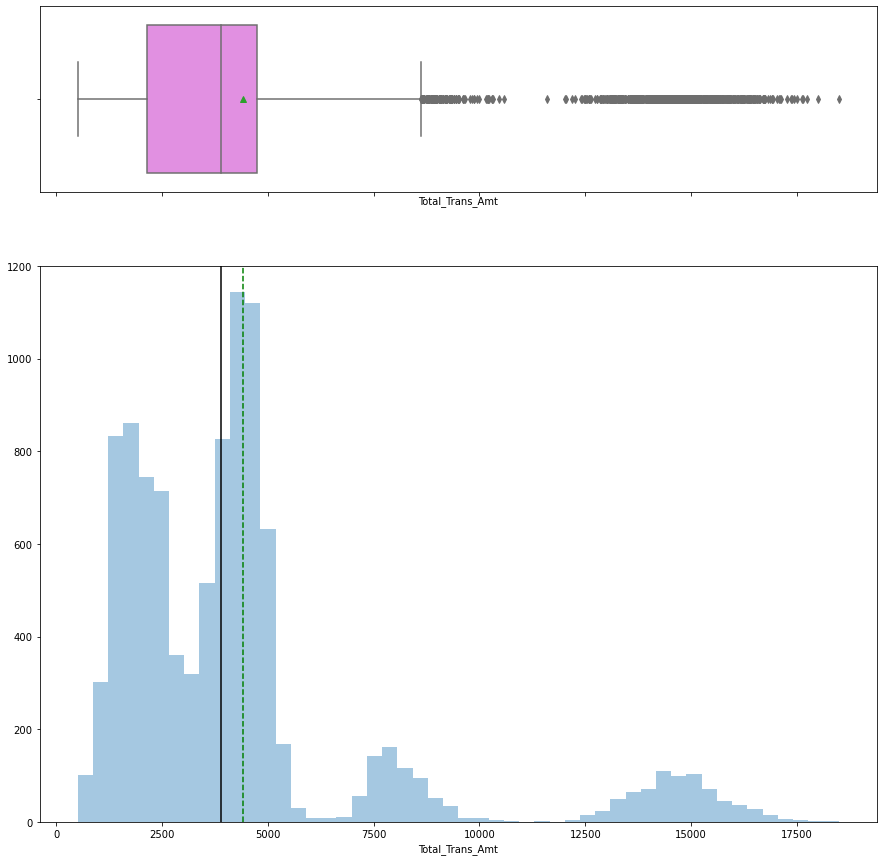

In [32]:
histogram_boxplot(data["Total_Trans_Amt"])

### Observation
1. Average Total Transaction Amount for the Last 12 months is 4000
2. Median Total Transaction Amount for the Last 12 months is 3000
3. Outliers for Total Transaction Amount is from 7500 and above

## Total_Trans_Ct

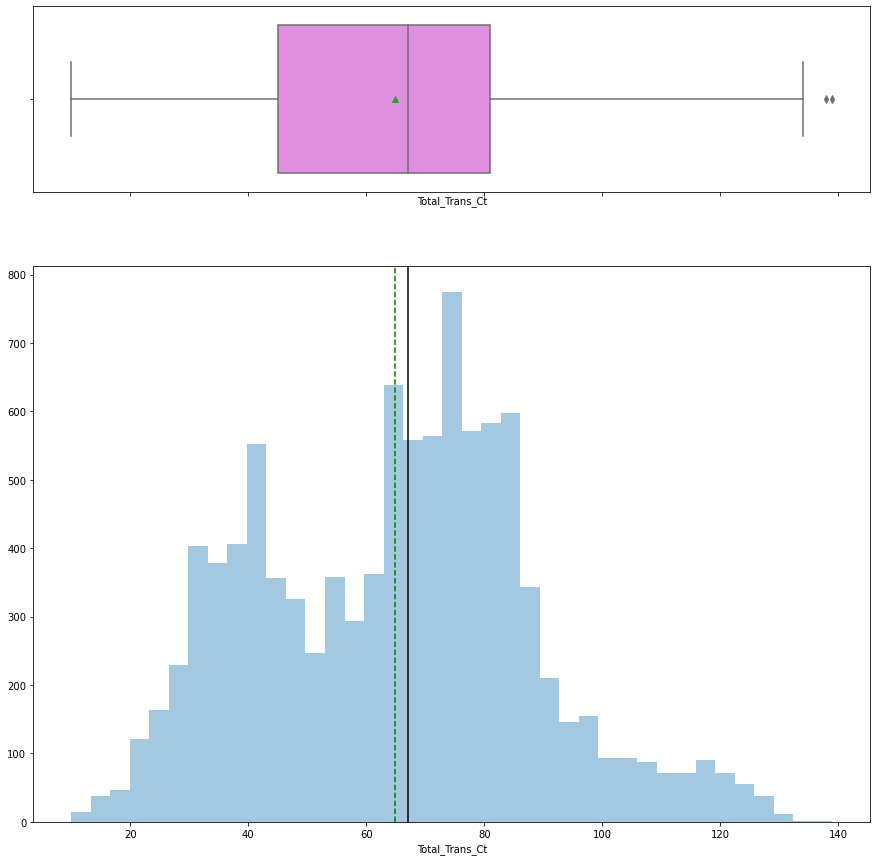

In [33]:
histogram_boxplot(data["Total_Trans_Ct"])

## Observation
1. Average Total Transaction Count for the Last 12 months is 62
2. Median Total Transaction Count Last the 12 months is 63.
3. There are a few outliers with a Total Transaction Count for Last 12 months at 135

## Total_Ct_Chng_Q4_Q1

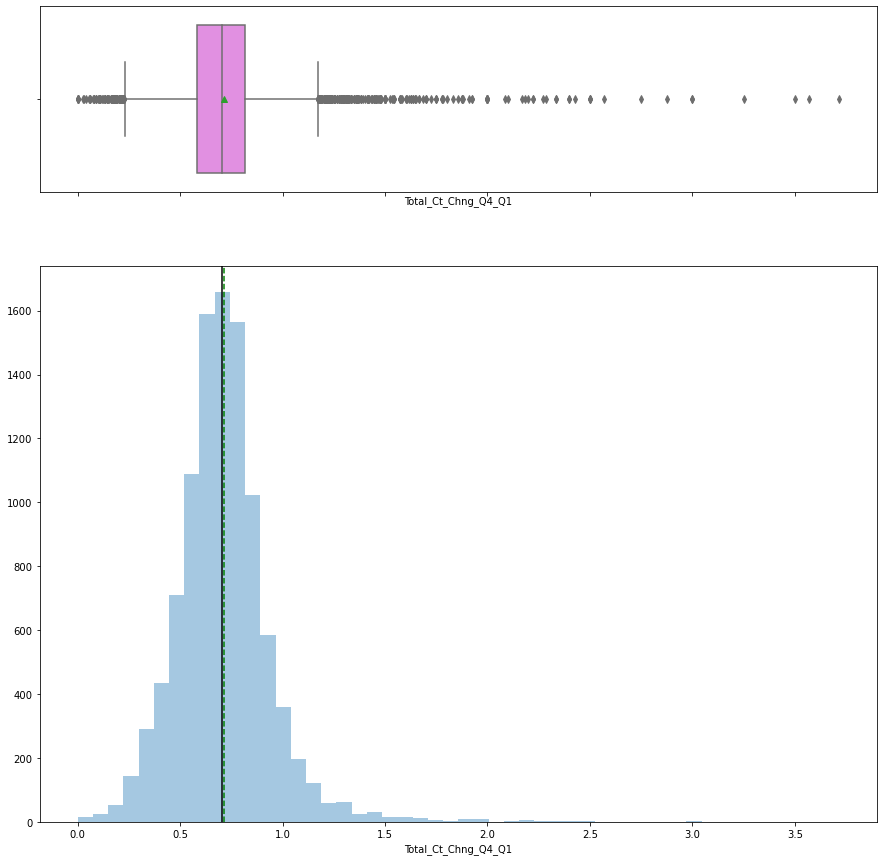

In [34]:
histogram_boxplot(data["Total_Ct_Chng_Q4_Q1"])

### Observation
1. Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter has a normal distribution.
2. The Average and median Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter is 0.4

## Avg_Utilization_Ratio

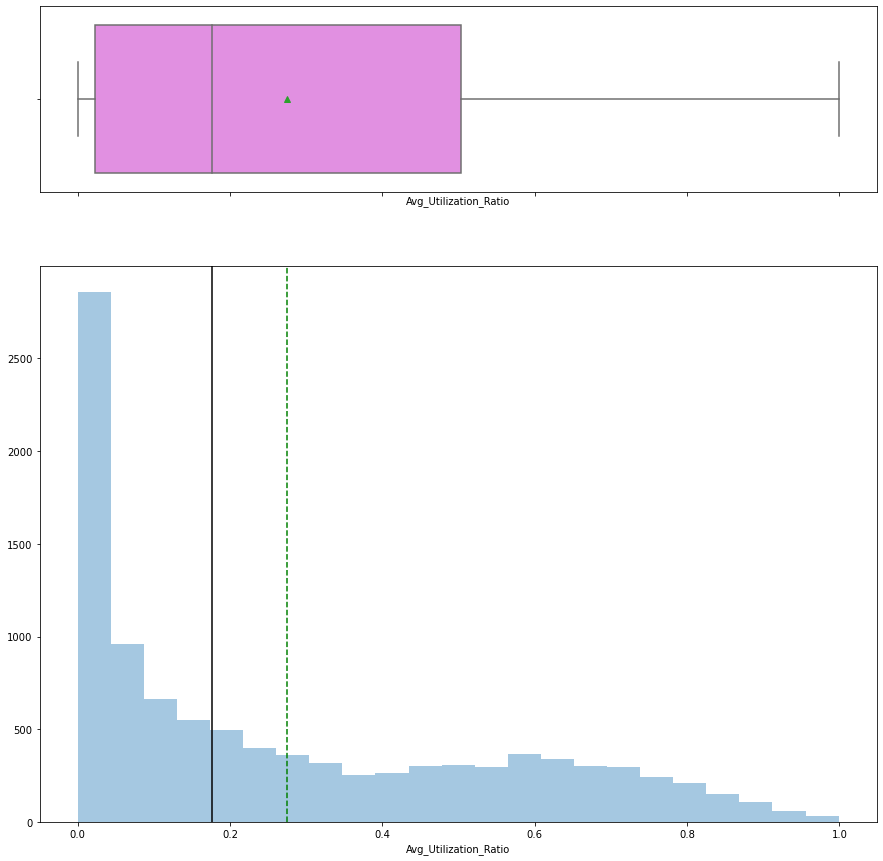

In [35]:
histogram_boxplot(data["Avg_Utilization_Ratio"])

### Observation
1. Average available credit the customer spent ratio is 0.27

## Bivariate Analysis

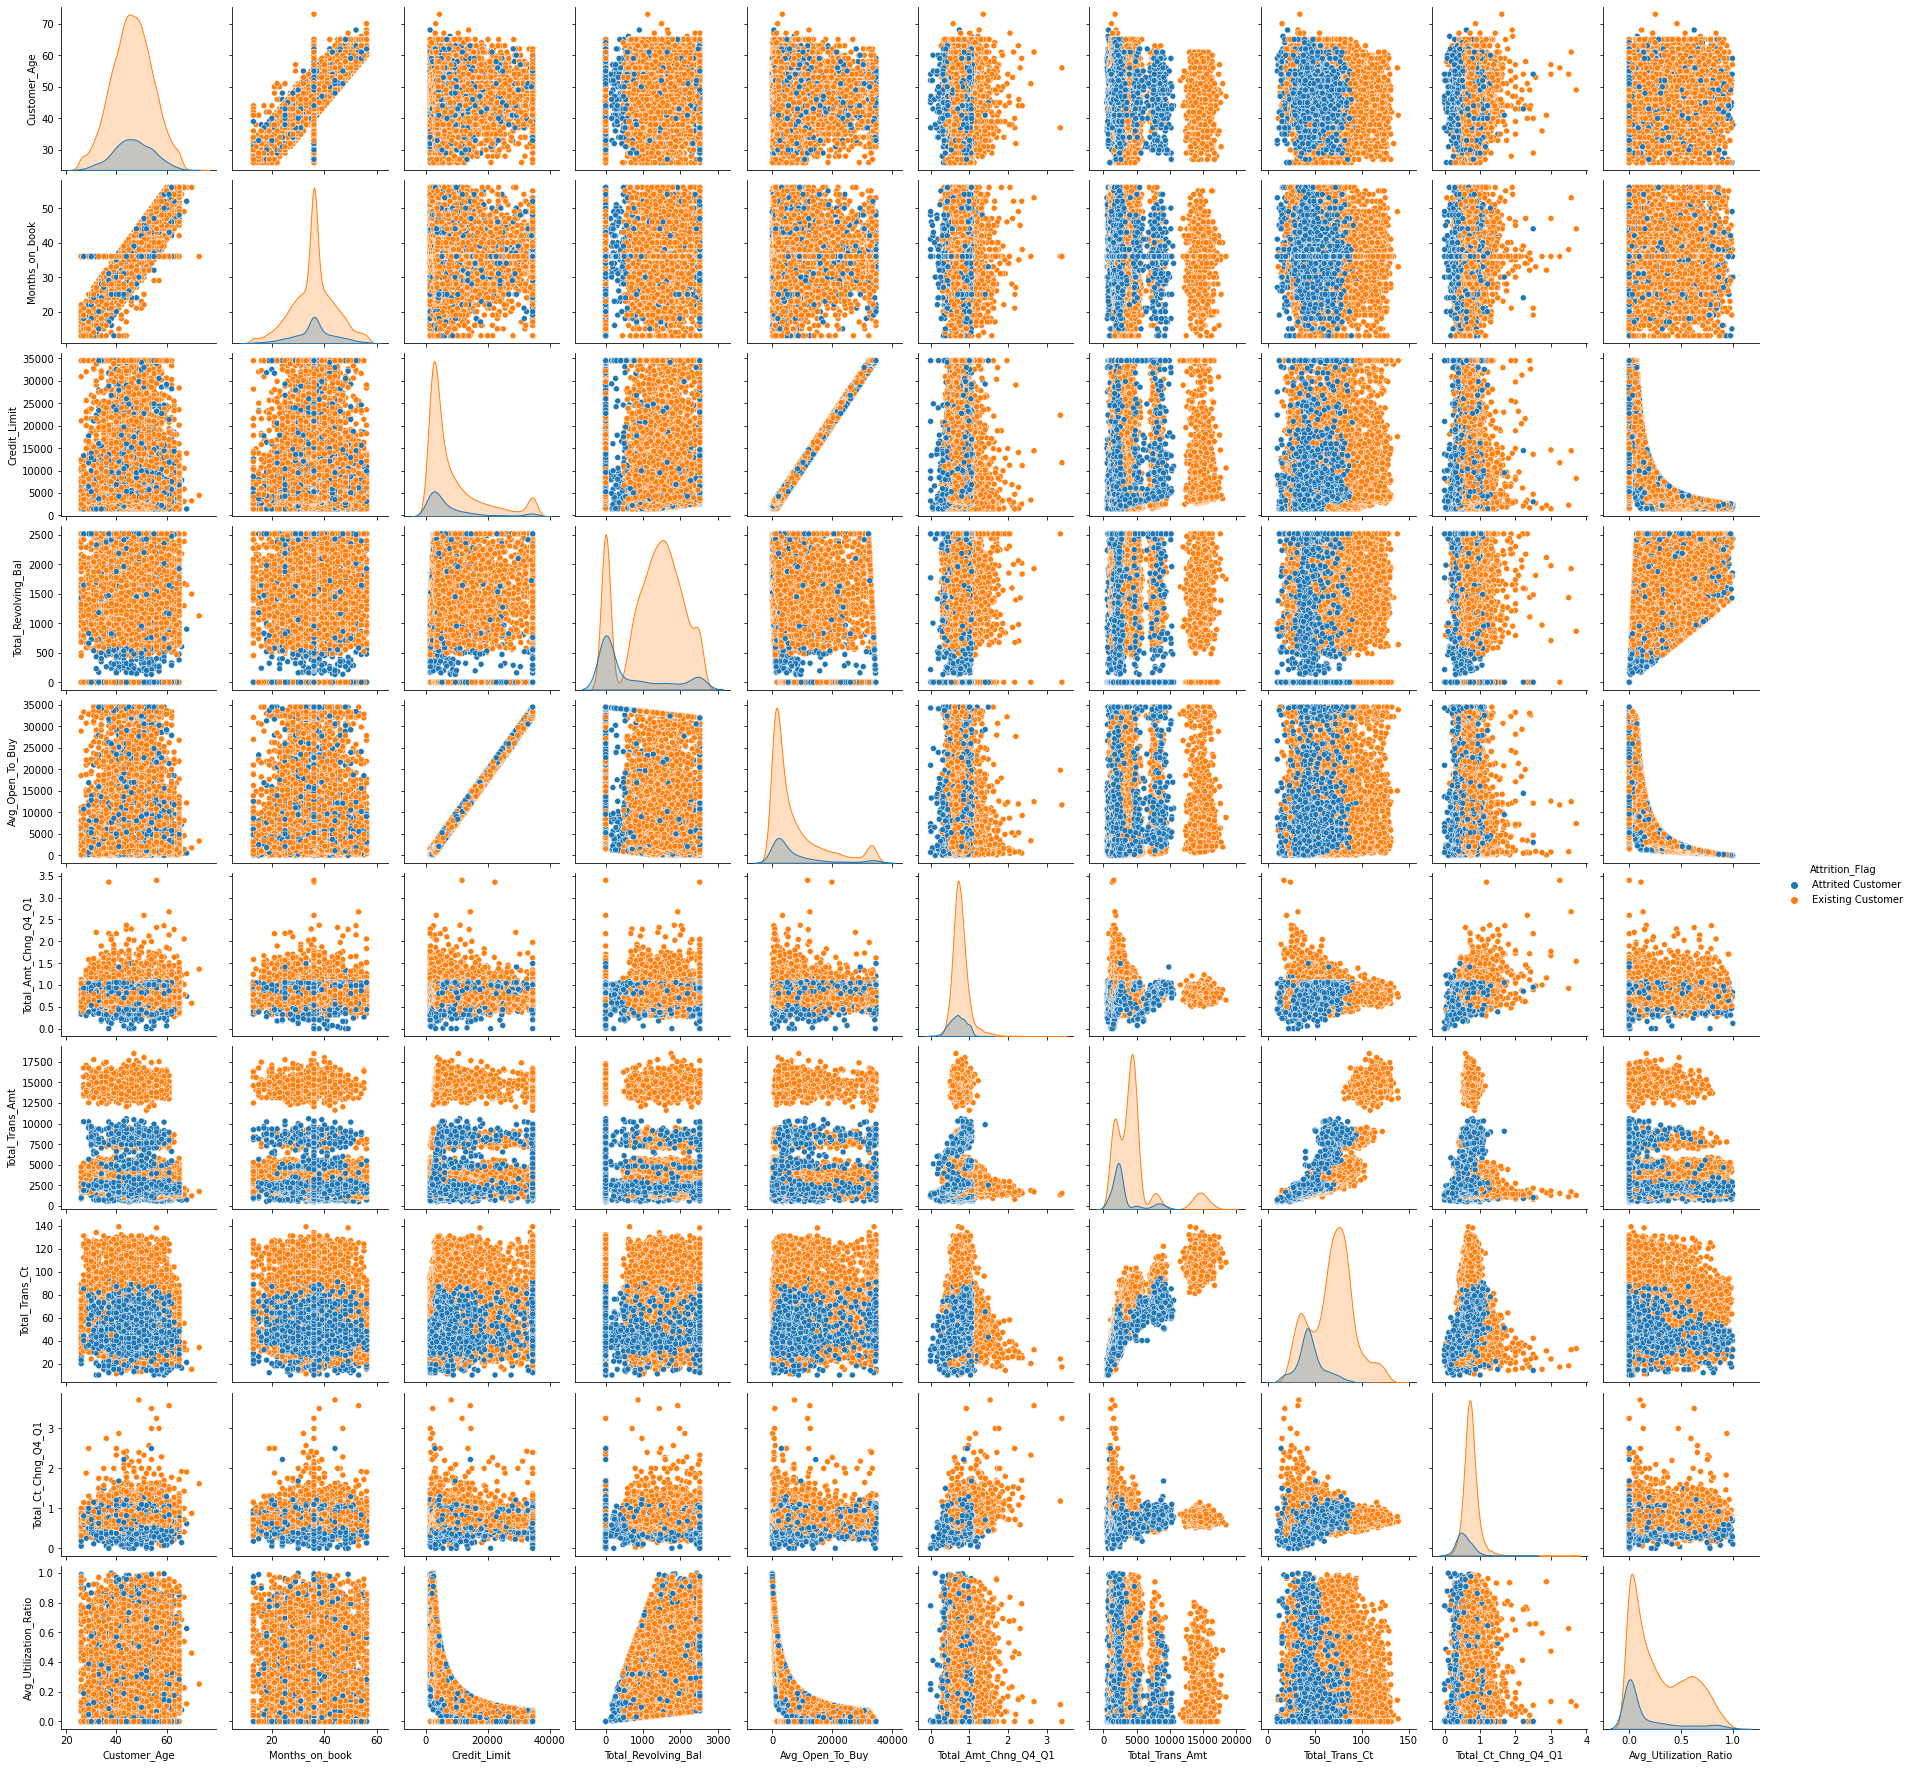

In [36]:
sns.pairplot(data, hue="Attrition_Flag")

### Observation.
1. the exixting customers are predominantly variable
2. most of the varible show a normal distribution
3. Other plots are rightly skwed

## Attrition_Flag Vs Customer_Age

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

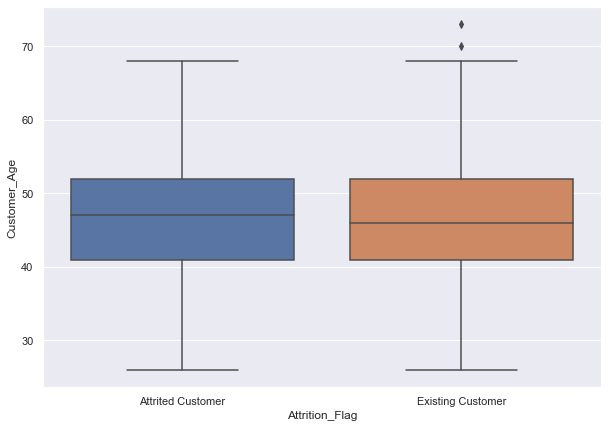

In [37]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=data, orient="vertical")

### Observation:
1. Both attrited and existing customers have almost equal distribution to age.
2. Exsisting customers have a few outliers

In [114]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    # plt.legend(loc='lower left', frameon=False)
    # plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

## Attrition_Flag Vs Gender

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


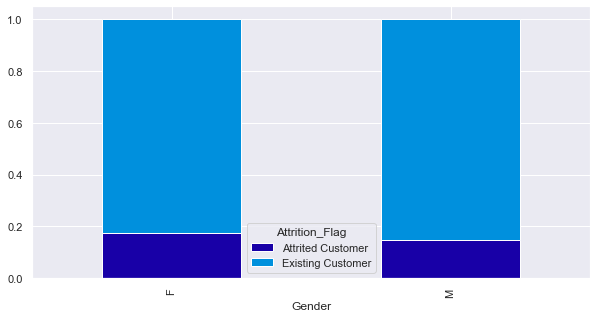

In [39]:
stacked_plot(data["Gender"])

### Observation
1. 84% of customers of both male and female are existing customer
2. 16% of customers of both male and female are attrited customers 

## Attrition_Flag Vs Dependent_count

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


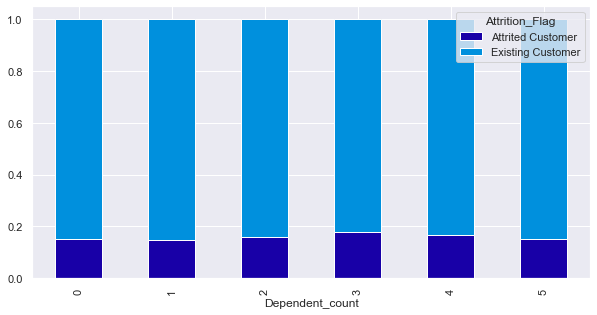

In [40]:
stacked_plot(data["Dependent_count"])

### Observation
1. 22% of existing customer whi have 3 dependents which is the highest.
2. A total of 16% of the enitre attrited customer have 1-5 dependants

## Attrition_Flag Vs Education_Level

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


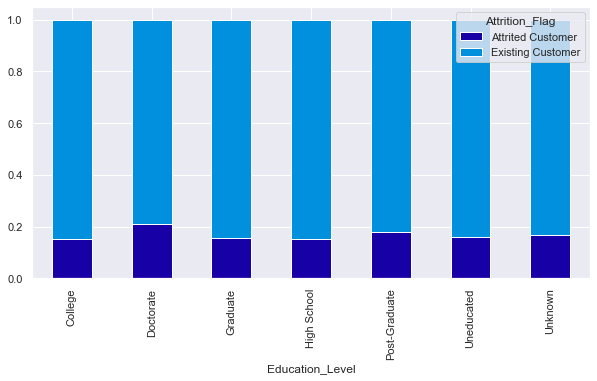

In [41]:
stacked_plot(data["Education_Level"])

### Observation
1. Existing Customers with doctorate are the highest number of customers.
2. High school and Unducated existing customers are the next highest existing customers.

## Attrition_Flag Vs Marital_Status

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


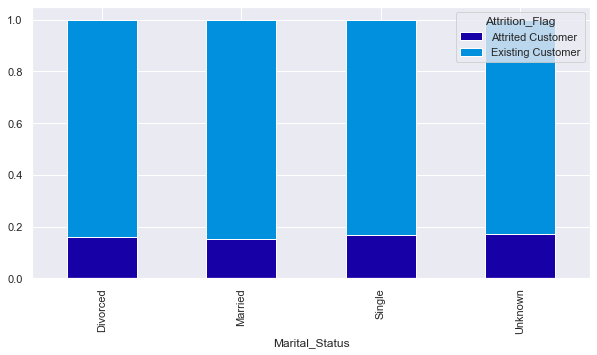

In [42]:
stacked_plot(data["Marital_Status"])

### Observation
1. Existing customers Married and Divorced are majority of the bank customers.
2. A collective amount of attribute customers marital status are a minority

## Attrition_Flag Vs Income_Category

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


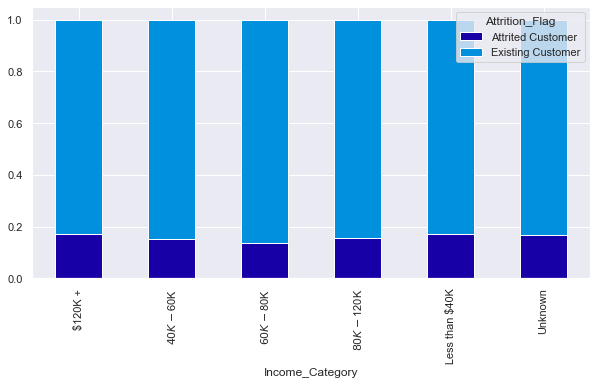

In [115]:
stacked_plot(data["Income_Category"])

### Observation:
1. The Conversion of Existing customers is highest got customers earning less than 40k 
2. The conversion of Exisiting Customers who earn above 40k -60k are most equal across board

## Income_Category VS Credit_Limit

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

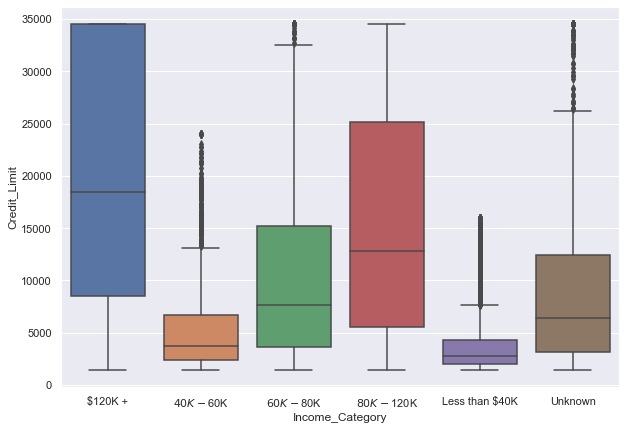

In [121]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Income_Category", y="Credit_Limit", data=data, orient="vertical")

### Observation
1. 120k + income earners have a high credit limit
2. Less tha 40k Income earners have a median of 2500 of credit limit.
3. General observation credit limited is given based on income level.

## Attrition_Flag Vs Income_Category/Card_Category

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

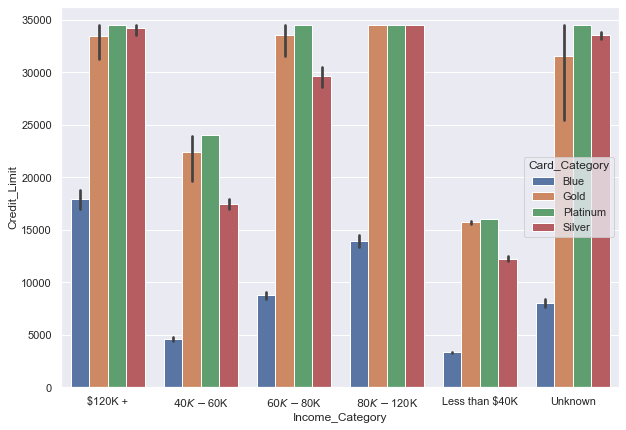

In [123]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.barplot(x="Income_Category", y="Credit_Limit", hue='Card_Category', data=data, orient="vertical")

### Observation
1. All category of income earners have all class of credit cards
2. Gold, Silver and Plantium cards are held by high income earners

## Attrition_Flag Vs Card_Category

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


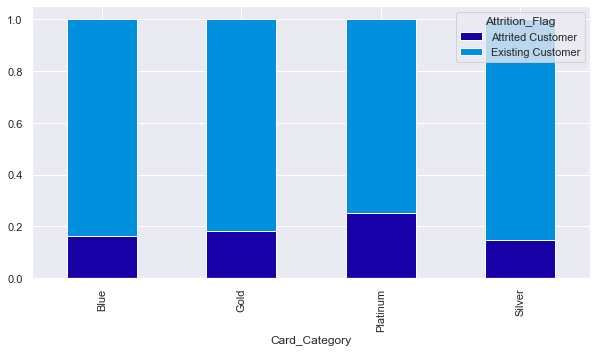

In [44]:
stacked_plot(data["Card_Category"])

### Observation:
1. Existing customers with blue cards are the highest customers
2. Blue cards who are Attrition customers are the highest.
3. Attrition and Existing customers that own platinum cards are below 1%

## Attrition_Flag Vs Months_on_book

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_on_book'>

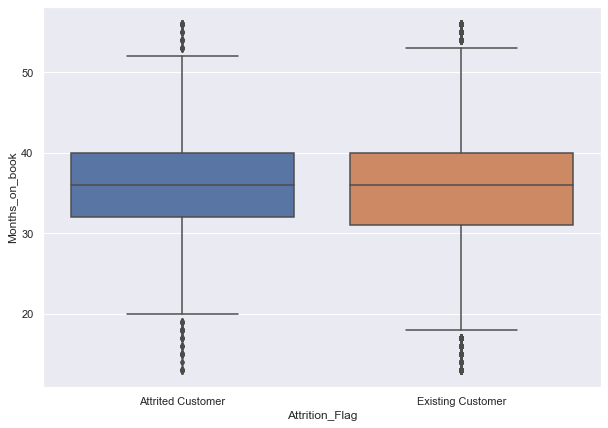

In [45]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Months_on_book", data=data, orient="vertical")

## Observation
1. Attrited and existing customers hava the same median of 36 months
2. There are outlies from the minimum and maximum variables.

## Attrition_Flag Vs Months_Inactive_12_mon

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
0                                      15                 14     29
1                                     100               2133   2233
2                                     505               2777   3282
3                                     826               3020   3846
4                                     130                305    435
5                                      32                146    178
6                                      19                105    124
All                                  1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


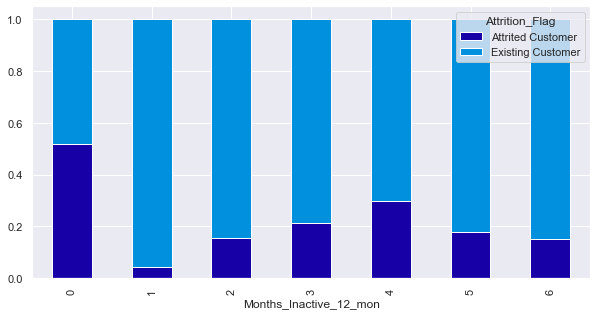

In [46]:
stacked_plot(data["Months_Inactive_12_mon"]) 

### Observation
1. Existing customer had the highest number of inactive account foe 3 and 2 months
2. A total of 29 customers did not have the account inactive at anypoint in time


## Attrition_Flag Vs Total_Relationship_Count

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


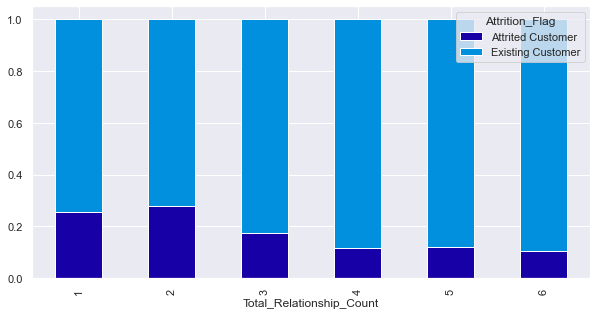

In [47]:
stacked_plot(data["Total_Relationship_Count"]) 

### Observation
1. Existing customers who have 3 products with the bank are the highest.
2. Existing customers who have 4-6 products with the bank are almost equal across board.

## Attrition_Flag Vs Contacts_Count_12_mon

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


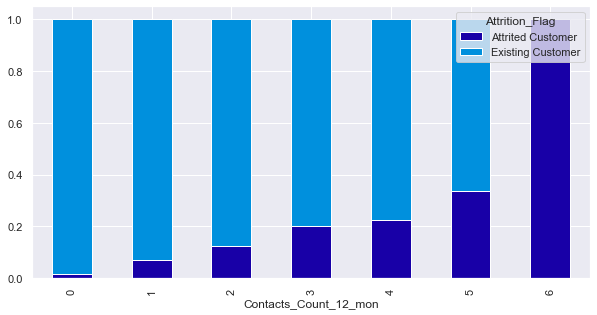

In [48]:
stacked_plot(data["Contacts_Count_12_mon"]) 

### Obseravtion
1. No Existing Customers had contact with the bank more than 6 times in a year.
2. The higest number of Existing Customers contacted the bank 2-3 times in a year
3. Only 7 customers from Attrited customers didnt have contat with the bank in a year.

## Attrition_Flag Vs Credit_Limit

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

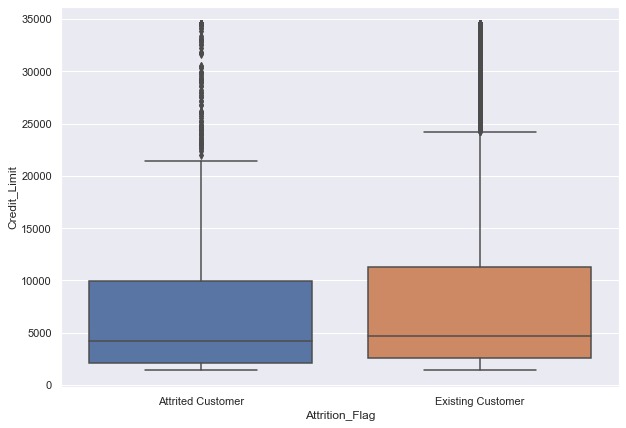

In [49]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=data, orient="vertical")

### observation
1. Existing and Attrited customers have a close credit median of 4900.
2. Customers with high credit limit are the outliers.

## Attrition_Flag Vs Total_Amt_Chng_Q4_Q1, Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,
        

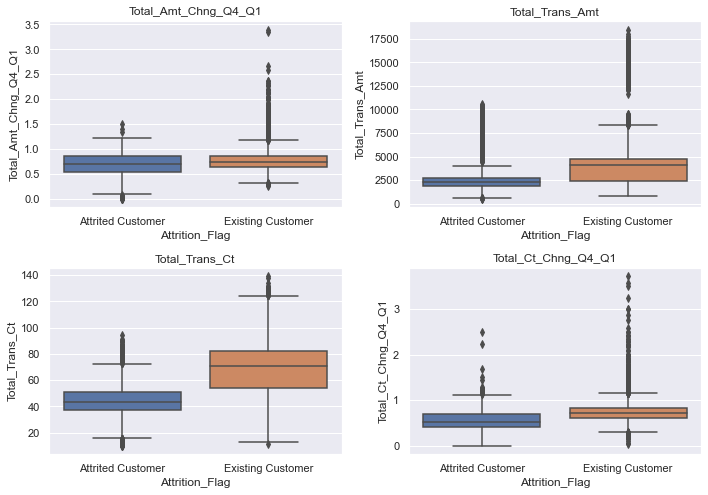

In [50]:
cols = data[
    [
        "Total_Amt_Chng_Q4_Q1",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Ct_Chng_Q4_Q1",
        
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Observation.
1. Total Transaction Amount the Last 12 months have a median of 4000 with a higher count for existing customers.
2. There are a outliers which are the high amounts for the Total Transaction Amount the Last 12 months are for both exsiting and atrrited customers.
3. Total Transaction Amount the Last 12 months have a median of 1900 with a higher count for Attrited customers.
4. Total Transaction Count for the Last 12 months for existing customer has a count of 71 transations with a maximum of 122 transations and few outliers
5. Existing customers have higher Ratio of 0.7 total transaction count in 4th quarter and the total transaction count in 1st quarter compared to attried customers who has a ratio of 0.5.
6. The are outliers on both attrited and existing customers on all varibales in the box plots.
4. Existing and Attrited customers have almost equal medians of 0.7 Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter

## Attrition_Flag Vs Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Avg_Utilization_Ratio

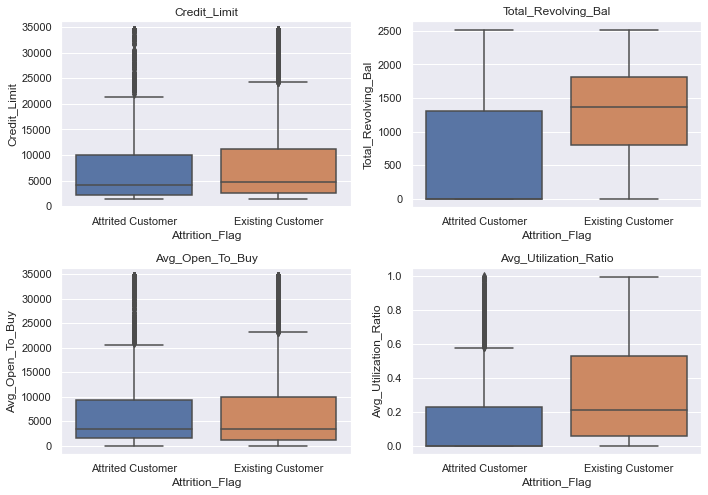

In [51]:
cols = data[["Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Avg_Utilization_Ratio"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Observation.
1. Attribed customers have a total revovling balance distribution of 1300 and a maximum of 2500 and there are no outliters
2. Existing customer total revovling balance have a median of 1400 and there are no outliers.
3. Average open to buy between existing and attrited customers are equal in measure.
4. Average utilization ratio for exsisting customers are higher and a mdeian of 0.3.
5. Attrited customers Average utilization ratio count is concentrated between 0.0-0.3 with outliers.

## Variable Correlation: HeatMap

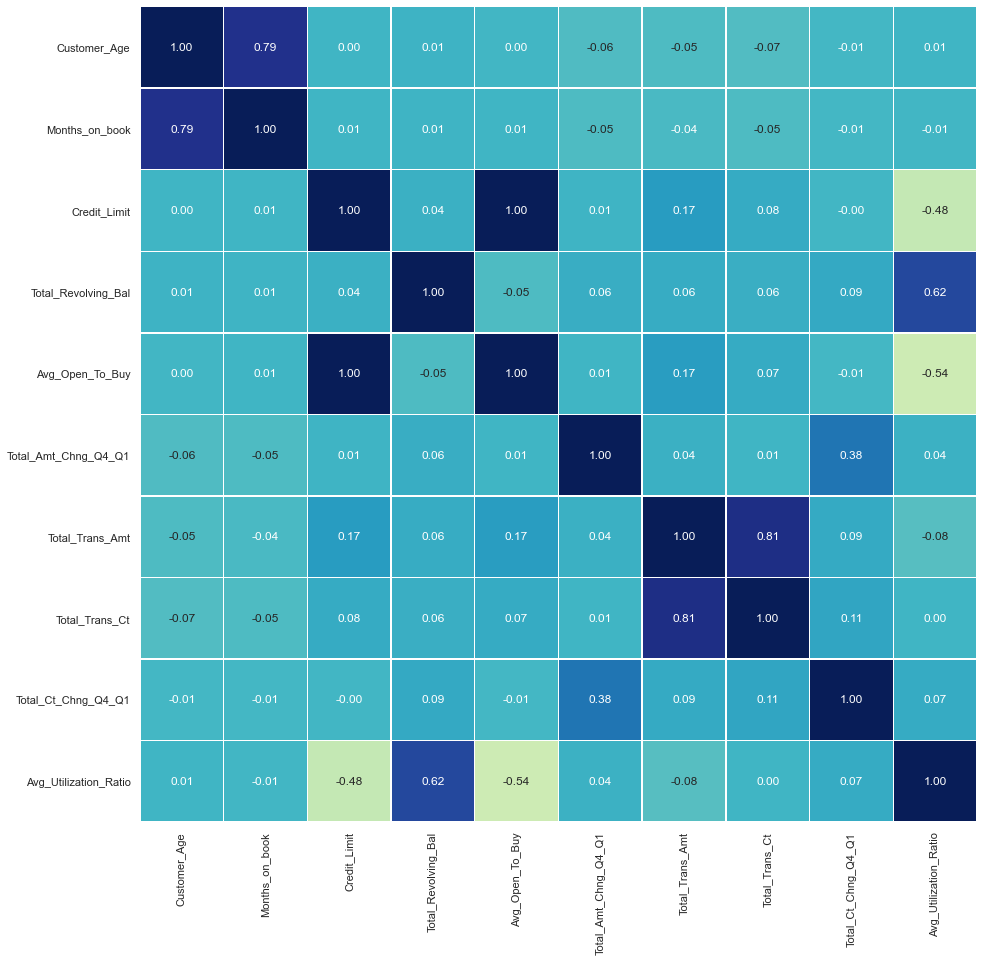

In [52]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

### Observation
1. Customers age to months on the books have a high correlation OF 0.79 as an older customer would have opened a bank account before someone younger.
2. Total transaction amount have a high correlation ot 0.81 with total transaction count.
3. Total revolving balance anf average utilization ratio has an average correlation of 0.62.
4. Customer Age has a negative correlation with total transaction count in 4th quarter and the total transaction count in 1st quarter, Total transaction count and Amount. 

## outlier detection

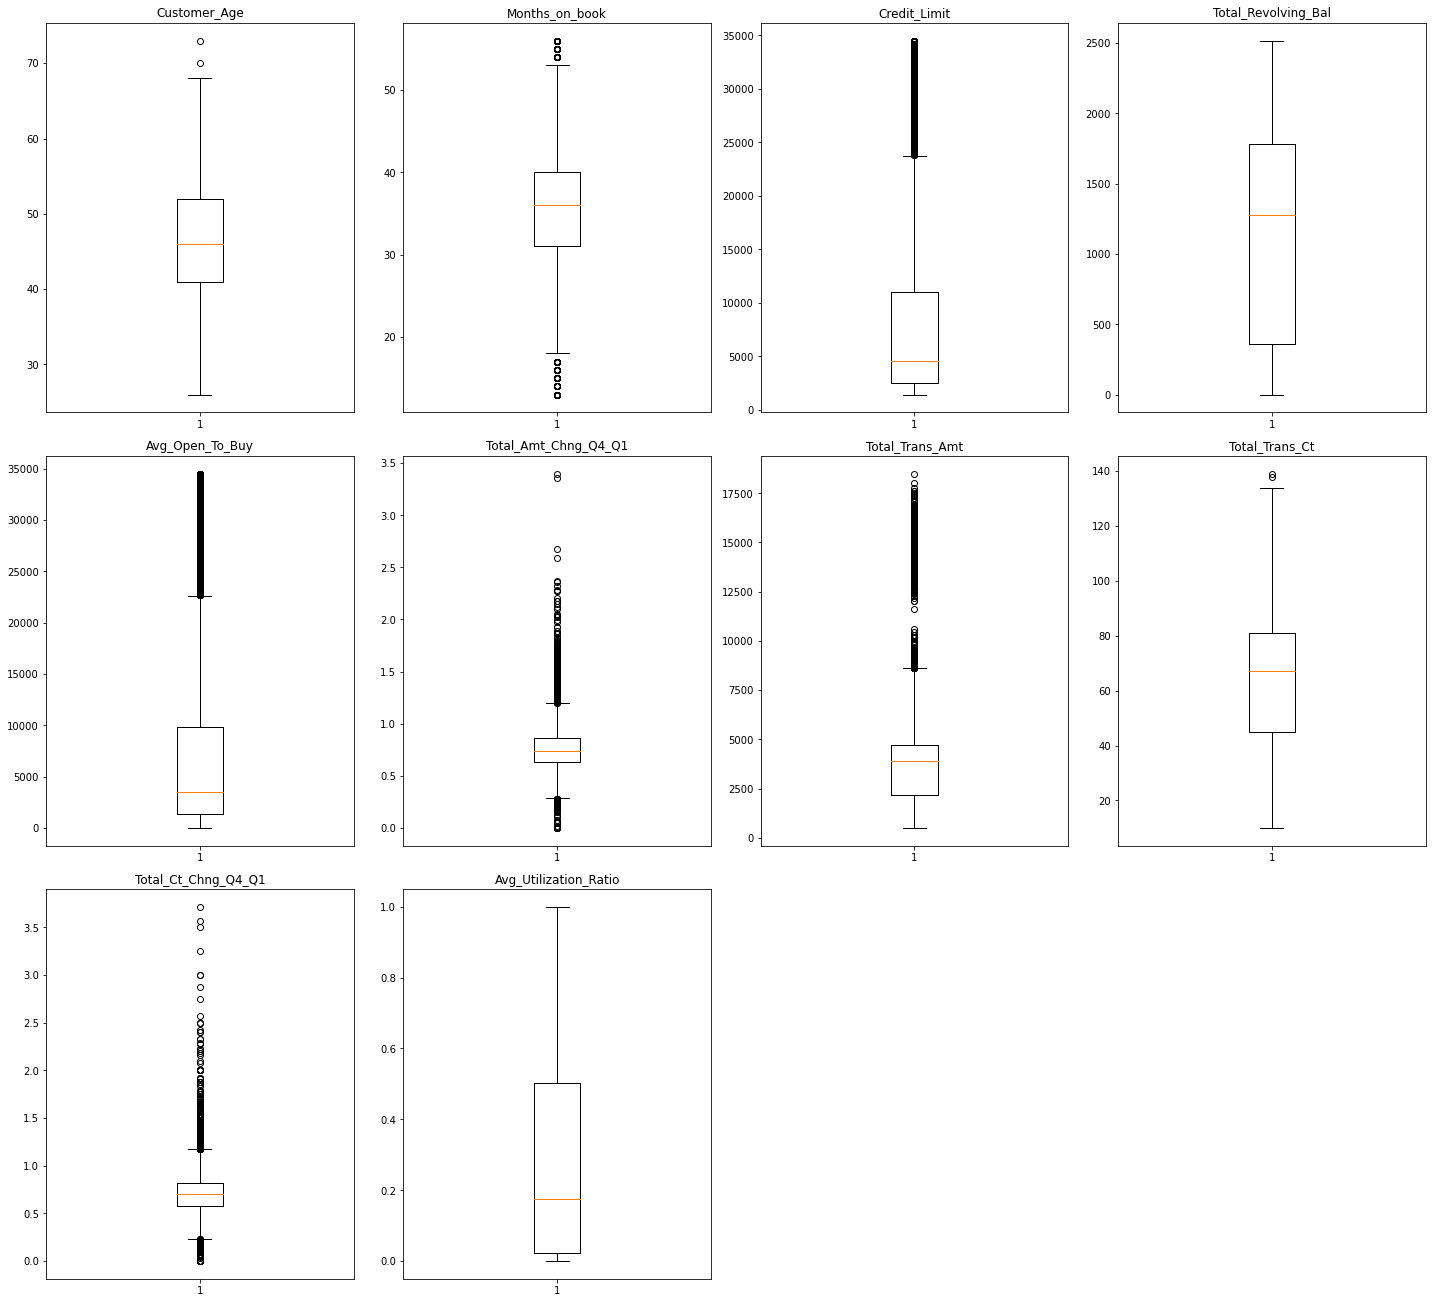

In [15]:
# outlier detection using boxplot
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

## outlier treatment

In [64]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        data = treat_outliers(df,c)
        
    return data

## Data Preprocessing

In [65]:
imputer = KNNImputer(n_neighbors=5)

In [66]:
reqd_col_for_impute = ['Education_Level', 'Marital_Status',
       'Income_Category', 'Gender','Card_Category']

In [67]:
data[reqd_col_for_impute].head()

Education_Level Marital_Status Income_Category Gender Card_Category
0     High School        Married     $60K - $80K      M          Blue
1        Graduate         Single  Less than $40K      F          Blue
2        Graduate        Married    $80K - $120K      M          Blue
3     High School        Unknown  Less than $40K      F          Blue
4      Uneducated        Married     $60K - $80K      M          Blue

In [68]:
data1=data.copy()

In [69]:
Education_Level = {'Graduate':1, 'High School':2, 'Uneducated':3,'College':4,'Post-Graduate':5,'Doctorate':6}
data1['Education_Level']=data1['Education_Level'].map(Education_Level)
Marital_Status = {'Married':1,'Single':2, 'Divorced':3}
data1['Marital_Status']=data1['Marital_Status'].map(Marital_Status)
Income_Category = {'Less than $40K':1,'$40K - $60K':2, '$80K - $120K':3, '$60K - $80K':4, '$120K +':5}
data1['Income_Category']=data1['Income_Category'].map(Income_Category)
Gender = {'M':1,'F':2}
data1['Gender']=data1['Gender'].map(Gender)
Card_Category = {'Blue':1,'Silver':2, 'Gold':3,'Platinum':4}
data1['Card_Category']=data1['Card_Category'].map(Card_Category)

In [70]:
data1.head()

Attrition_Flag  Customer_Age Gender Dependent_count  Education_Level  \
0  Existing Customer            45      1               3              2.0   
1  Existing Customer            49      2               5              1.0   
2  Existing Customer            51      1               3              1.0   
3  Existing Customer            40      2               4              2.0   
4  Existing Customer            40      1               3              3.0   

   Marital_Status  Income_Category Card_Category  Months_on_book  \
0             1.0              4.0             1              39   
1             2.0              1.0             1              44   
2             1.0              3.0             1              36   
3             NaN              1.0             1              34   
4             1.0              4.0             1              21   

  Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
0                        5                      1                     3   
1                        6                      1                     2   
2                        4                      1                     0   
3                        3                      4                     1   
4                        5                      1                     0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

## Model Building - Approach
1. Partition the data into train and test set.
2. Treat missing values using KNNImputer
3. Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models.
4. Make a logistic regression model - Improve model performance by up and downsampling the data - Regularize above models
5. Built different classifiers using K-Fold cross-validation, pipelines and StandardScaler.
6. Hyperparameter tuning the model which gives the best cross-validation score
7. Build the model using optimal hyperparameters and test the performance on the test set.

### Model evaluation criterion
### We will be using Recall as a metric for our model performance because here company could face 2 types of losses
* Which existing customers leaving credit cards services - Be a loss to the bank?
* Which attrited customers leaving the bank and still want to use the bank credit cards services - Loss of business opportunity for the bank?

### Which loss will be greater?
Would existing customers not using the credit card service reduce the banks profit i.e Predicting a person not at risk of paying its credit card bills?, while attribute customers are the at risk of getting credit cards and not defaulting.

### How to reduce this loss i.e need to reduce False Negatives thne increase false positive and true positive?
Company wants recall to be maximized i.e. we need to reduce the number of false negatives.

### First, let's impute missing values
* We will use KNN imputer to impute missing values.
* KNNImputer: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

### Dropped columns
Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 columns were dropped becasue it a ratio analysis of 2 existing columns Total_Trans_Amt and Total_Trans_Ct: Total Transaction Count (Last 12 months). On the bases it looks like a repeat to represnted data in my model which will not be siginificant


## Split Data

In [71]:
X = data1.drop(["Attrition_Flag",'Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1'], axis=1)
y = data1["Attrition_Flag"].apply(lambda x : 1 if x=='Existing Customer' else 0)

In [72]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(7088, 17) (3039, 17)


## Using KNN to treat "UNKNOWN VALUES"

In [73]:
#Fit and transform the train data
X_train[reqd_col_for_impute]=imputer.fit_transform(X_train[reqd_col_for_impute])

#Transform the test data 
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [74]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt           

In [75]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [76]:
inverse_mapping(Gender,'Gender')
inverse_mapping(Education_Level,'Education_Level')
inverse_mapping(Marital_Status,'Marital_Status')
inverse_mapping(Income_Category,'Income_Category')
inverse_mapping(Card_Category,'Card_Category')

In [77]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 45) (3039, 45)


In [78]:
X.head()

Customer_Age Gender Dependent_count  Education_Level  Marital_Status  \
0            45      1               3              2.0             1.0   
1            49      2               5              1.0             2.0   
2            51      1               3              1.0             1.0   
3            40      2               4              2.0             NaN   
4            40      1               3              3.0             1.0   

   Income_Category Card_Category  Months_on_book Total_Relationship_Count  \
0              4.0             1              39                        5   
1              1.0             1              44                        6   
2              3.0             1              36                        4   
3              1.0             1              34                        3   
4              4.0             1              21                        5   

  Months_Inactive_12_mon Contacts_Count_12_mon  Credit_Limit  \
0                      1                     3       12691.0   
1                      1                     2        8256.0   
2                      1                     0        3418.0   
3                      4                     1        3313.0   
4                      1                     0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt  Total_Trans_Ct  \
0                  777          11914.0             1144              42   
1                  864           7392.0             1291              33   
2                    0           3418.0             1887              20   
3                 2517            796.0             1171              20   
4                    0           4716.0              816              28   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

## Model Building

In [33]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [34]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Model Building Bagging and Boosting Model

## Decision Tree Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.928923988153998
Recall on training set :  1.0
Recall on test set :  0.9604076832614661
Precision on training set :  1.0
Precision on test set :  0.9551656920077972


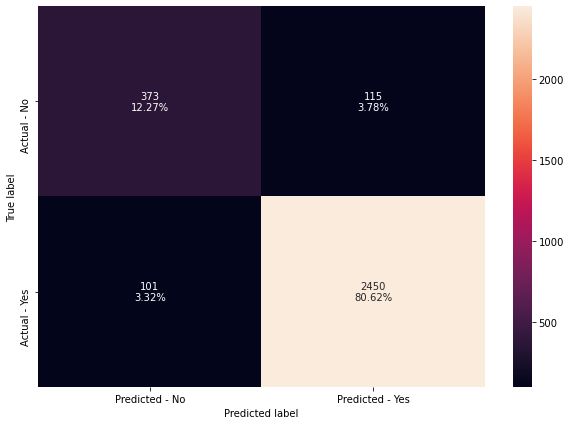

In [80]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

1. The model is overfitting the training data as training recall/precision is much higher than the test recall/precision

## Cost Complexity Pruning
### Let's try pruning the tree and see if the performance improves.

In [89]:
path = d_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [90]:
clfs_list = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs_list.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs_list[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.04712934020500609


In [91]:
#Fitting model for each value of alpha and saving the train recall in a list 
recall_train=[]
for clf in clfs_list:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

In [92]:
#Fitting model for each value of alpha and saving the test recall in a list
recall_test=[]
for clf in clfs_list:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

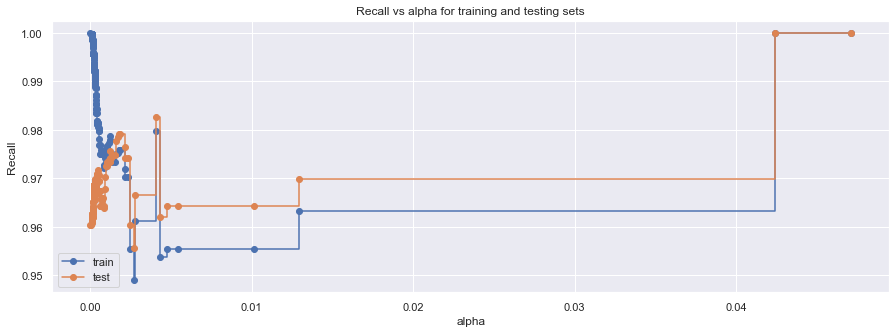

In [93]:
#Plotting the graph for Recall VS alpha 
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Accuracy on training set :  0.8393058690744921
Accuracy on test set :  0.8394208621256992
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8393058690744921
Precision on test set :  0.8394208621256992


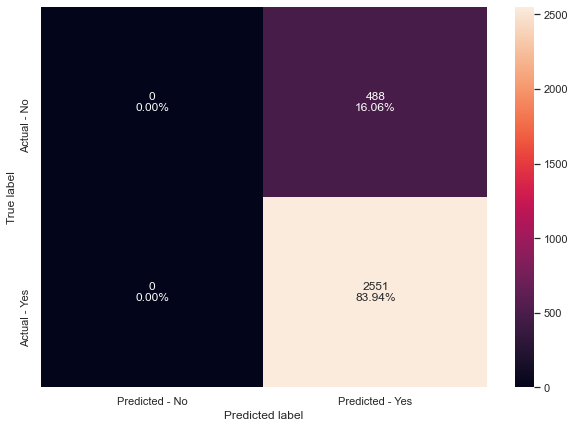

In [94]:
#Creating the model where we get highest test recall
index_best_pruned_model = np.argmax(recall_test)

pruned_dtree_model = clfs_list[index_best_pruned_model]

get_metrics_score(pruned_dtree_model)

make_confusion_matrix(pruned_dtree_model,y_test)

### Observation
1. We can see from the graph plotted above that maximum test recall is for the model with pruning i.e. alpha=0.05
2. There is an improvement in the model performance as the best pruned model fitted is higher than what was built initially.
3. The is no underfitting and underfitting.
4. Let's try hyperparameter tuning, with class weights to compensate for the imbalanced data, and see if the model performance improves.

In [81]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.16,1:0.84},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.01,
                       random_state=1)

Accuracy on training set :  0.8393058690744921
Accuracy on test set :  0.8394208621256992
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8393058690744921
Precision on test set :  0.8394208621256992


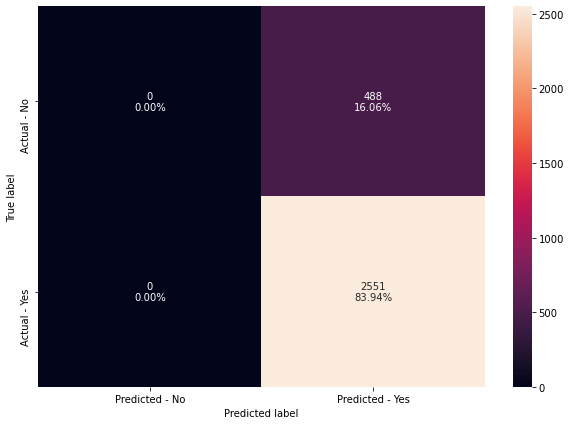

In [82]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

### Observation
* The model is generalizing well and no overfitting in the data
* The recall is still similar on the test data but the precision and accuracy has decreased slighly.


## Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.933201711089174
Recall on training set :  1.0
Recall on test set :  0.9792238337906704
Precision on training set :  1.0
Precision on test set :  0.9433534743202417


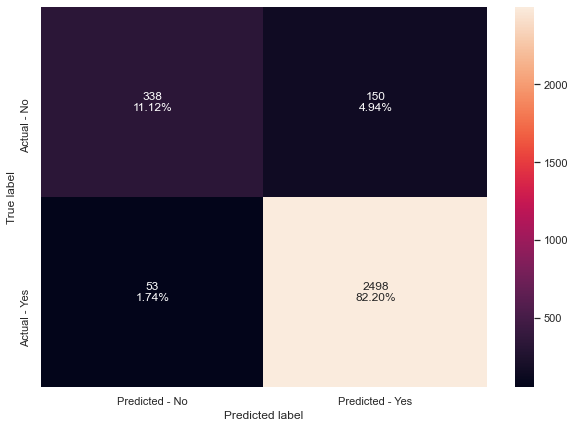

In [101]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

### Observation
1. With default parameters, random forest is performing good but not better than decision tree in terms of recall.
2. The model is slighly overfitting the training data.
3. We'll try to reduce overfitting and improve recall by hyperparameter tuning.

## Hyperparameter Tuning

In [103]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.16,1:0.84},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.16, 1: 0.84}, max_depth=5,
                       max_features='sqrt', n_estimators=10, oob_score=True,
                       random_state=1)

Accuracy on training set :  0.8483352144469526
Accuracy on test set :  0.8489634748272458
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8469533029612756
Precision on test set :  0.8475083056478405


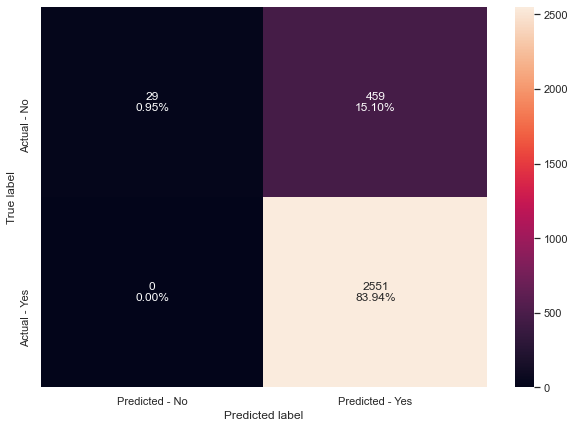

In [104]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

### Observation
The overfitting has reduced after tuning the model.
The recall has improved on the test data but the precision has decreased significantly.

In [105]:
from sklearn.ensemble import BaggingClassifier

## Bagging Classifier

Accuracy on training set :  0.9970372460496614
Accuracy on test set :  0.9427443237907206
Recall on training set :  0.9983190452176837
Recall on test set :  0.9666797334378675
Precision on training set :  0.9981512605042017
Precision on test set :  0.9651663405088062


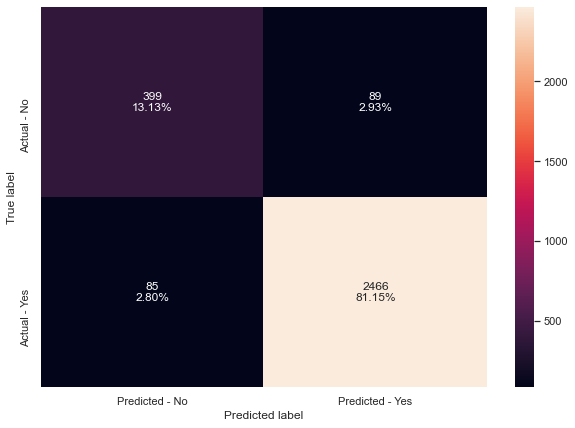

In [106]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

### Observation
1. With default parameters, bagging classifier is performing good in all matrix score
2. The model there is no overfitting data.


## Hyperparameter Tuning

In [107]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=20,
                  random_state=1)

Accuracy on training set :  0.8393058690744921
Accuracy on test set :  0.8394208621256992
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8393058690744921
Precision on test set :  0.8394208621256992


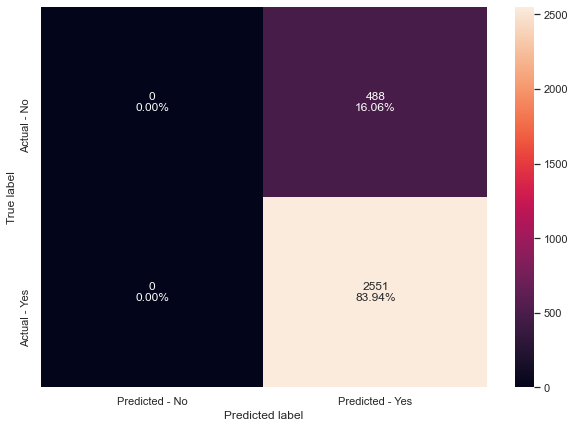

In [108]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)


### Observation
1. The test recall has improved but the model.
2. Precision has decreased 
3. There is no overfitting in the model

## AdaBoost Classifier

Accuracy on training set :  0.9503386004514672
Accuracy on test set :  0.9453767686739059
Recall on training set :  0.9793242561775088
Recall on test set :  0.9796158369266954
Precision on training set :  0.9621800165152766
Precision on test set :  0.9563719862227325


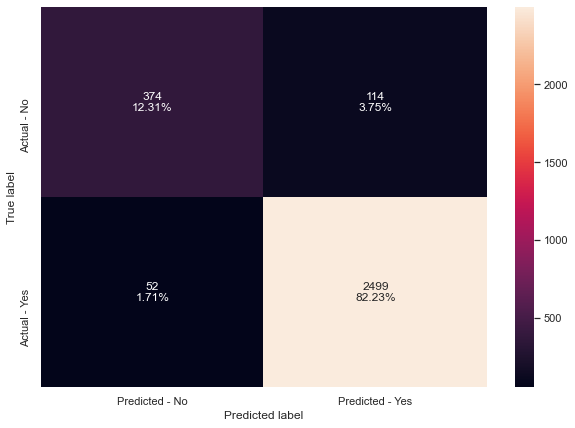

In [109]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

### Observation.
1. Recall has reduced and no overfitting in the model

## Hyperparameter Tuning

In [110]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

Accuracy on training set :  0.8393058690744921
Accuracy on test set :  0.8394208621256992
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8393058690744921
Precision on test set :  0.8394208621256992


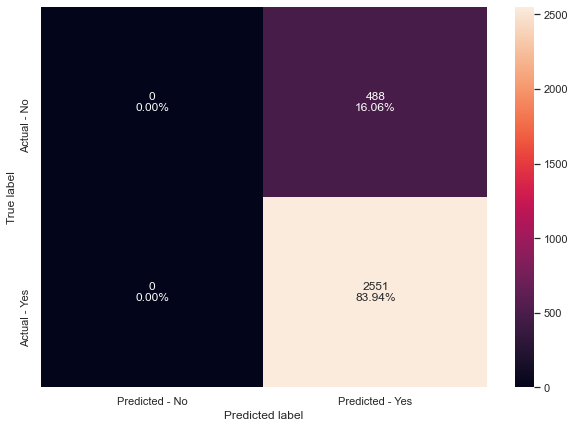

In [111]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

### Observation
1. Recall has improved but precision hasnt improved
2. No overfitting in the model.

## Gradient Boosting Classifier

Accuracy on training set :  0.9617663656884876
Accuracy on test set :  0.9499835472194801
Recall on training set :  0.9867204572197008
Recall on test set :  0.9796158369266954
Precision on training set :  0.9683272847245133
Precision on test set :  0.9615236629472874


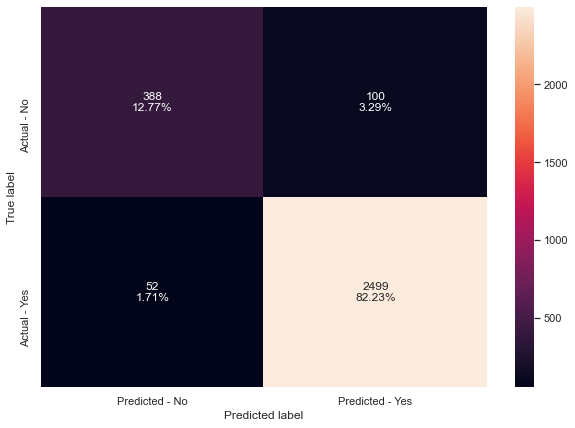

In [112]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

### Observation
1. No overfitting in the model
2. The overall model is good but not doing better decision tree and Adaboost

## Hyperparameter Tuning

In [113]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=0.9)

Accuracy on training set :  0.9003950338600452
Accuracy on test set :  0.8963474827245804
Recall on training set :  0.9914271306101866
Recall on test set :  0.991375931007448
Precision on training set :  0.9000457805585228
Precision on test set :  0.8961729270021261


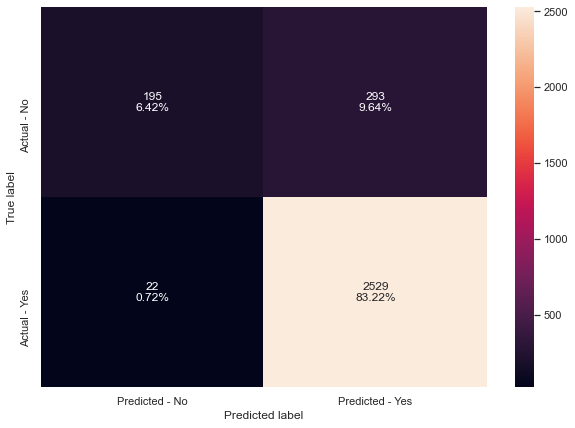

In [114]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)


### Observation
1. Recall remains the same but ther is overfitting on the training data for precision

## XGBoost Classifier

[20:25:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on training set :  1.0
Accuracy on test set :  0.9545903257650543
Recall on training set :  1.0
Recall on test set :  0.9792238337906704
Precision on training set :  1.0
Precision on test set :  0.9670925280681378


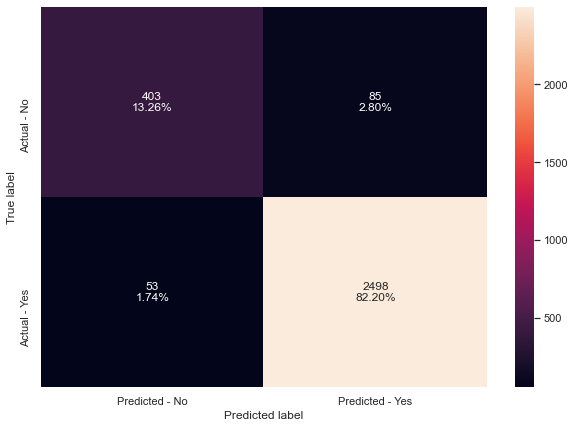

In [115]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

### Observation
1. Slight overfitting for the training data on the model.
2. Overall the model is doing well.

## Hyperparameter Tuning

In [134]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9882900677200903
Accuracy on test set :  0.9565646594274433
Recall on training set :  0.9951252311312826
Recall on test set :  0.9807918463347707
Precision on training set :  0.9909608302644795
Precision on test set :  0.9678916827852998


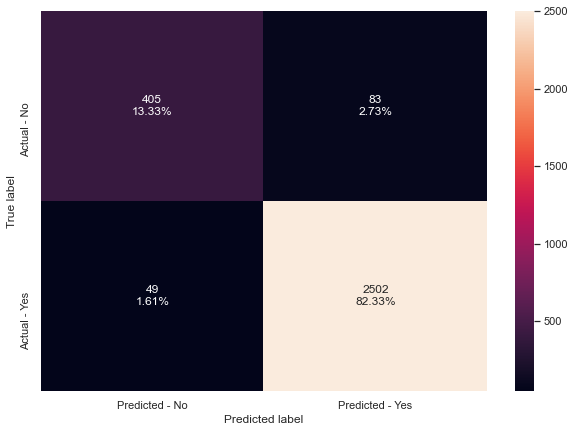

In [135]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

### Observation
1. the model no overfitting the training data.
2. Overall the model isnt as good as decsion tree, Adaboost and gradient boost


## Stacking Classifier

In [138]:
from sklearn.ensemble import StackingClassifier

In [139]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.16,
                                                                     1: 0.84},
                                                       max_depth=5,
                                                       max_features='sqrt',
                                                       n_estimators=10,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=1,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Decision Tree',
      

Accuracy on training set :  0.9143623024830699
Accuracy on test set :  0.9095097071405067
Recall on training set :  0.9631870902672718
Recall on test set :  0.9655037240297922
Precision on training set :  0.9365805818895063
Precision on test set :  0.929433962264151


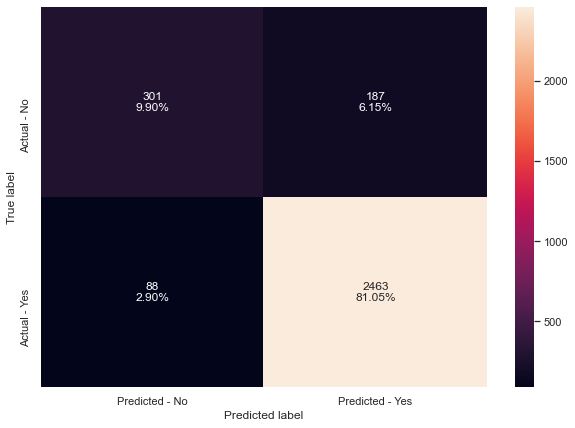

In [140]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

1. stack classifier didnt really improve the model from xgboost.
2. Very slight overfitting in the model data

## Comparing all models

In [141]:
# defining list of models
models = [d_tree, pruned_dtree_model, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [142]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Decision Tree Pruned','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
1                 Decision Tree Pruned        0.839306       0.839421   
2                  Tuned Decision Tree        0.839306       0.839421   
4                  Tuned Random Forest        0.848335       0.848963   
6             Bagging Classifier Tuned        0.839306       0.839421   
8            Tuned AdaBoost Classifier        0.839306       0.839421   
10  Tuned Gradient Boosting Classifier        0.900395       0.896347   
12            Tuned XGBoost Classifier        0.988290       0.956565   
7                  AdaBoost Classifier        0.950339       0.945377   
9         Gradient Boosting Classifier        0.961766       0.949984   
3                        Random Forest        1.000000       0.933202   
11                  XGBoost Classifier        1.000000       0.954590   
5                   Bagging Classifier        0.997037       0.942744   
13                 Stacking Classifier        0.914362       0.909510   
0                        Decision Tree        1.000000       0.928924   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  
1       1.000000     1.000000         0.839306        0.839421  
2       1.000000     1.000000         0.839306        0.839421  
4       1.000000     1.000000         0.846953        0.847508  
6       1.000000     1.000000         0.839306        0.839421  
8       1.000000     1.000000         0.839306        0.839421  
10      0.991427     0.991376         0.900046        0.896173  
12      0.995125     0.980792         0.990961        0.967892  
7       0.979324     0.979616         0.962180        0.956372  
9       0.986720     0.979616         0.968327        0.961524  
3       1.000000     0.979224         1.000000        0.943353  
11      1.000000     0.979224         1.000000        0.967093  
5       0.998319     0.966680         0.998151        0.965166  
13      0.963187     0.965504         0.936581        0.929434  
0       1.000000     0.960408         1.000000        0.955166

## Observation
1. Test recall has the best model output on decision tree st default, pruned and tuned with no overfitting

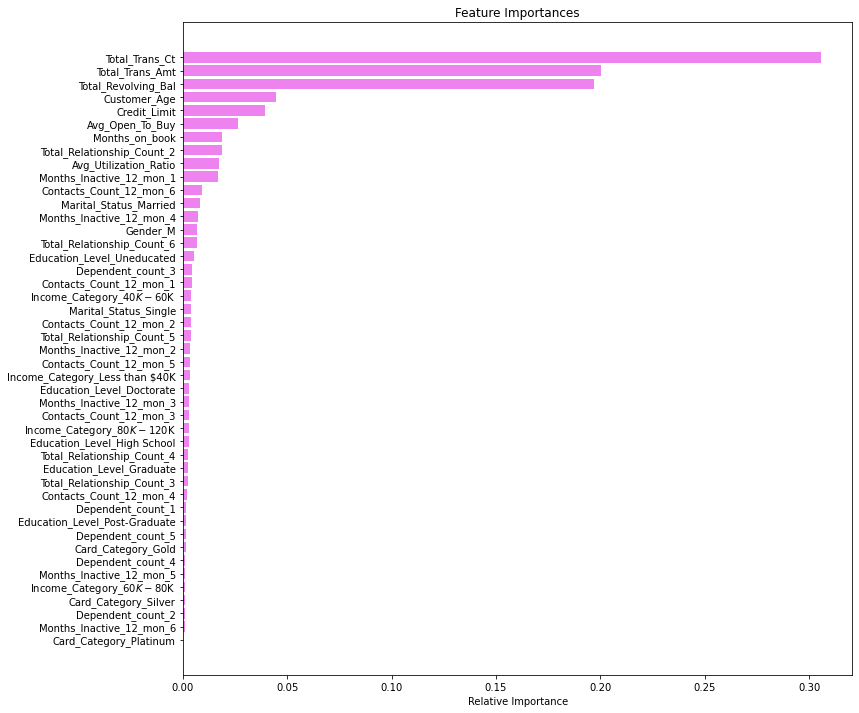

In [108]:
feature_names = X_train.columns
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Building Logistic Regression

In [31]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/osobaseugbesia/opt/anaconda3/lib/python3.8/site-packages (0.24.2)


In [84]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_scores(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train,)
    test_recall = metrics.recall_score(test_y,pred_test,)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [85]:
#Logistic Regression
# fit the model
lr= LogisticRegression(solver='liblinear',random_state=1)
# fit the model
lr.fit(X_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

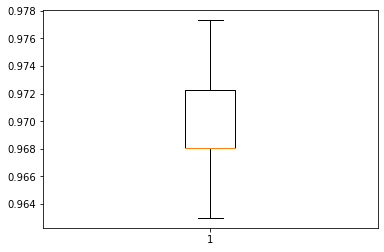

In [86]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=7)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

### Observation
1. Performance on training set varies between 0.96 to 0.977 recall.
2. Let's check the performance on test data.

Accuracy on training set :  0.8700620767494357
Accuracy on test set :  0.8687068114511353
Recall on training set :  0.9720961506135485
Recall on test set :  0.9745197961583693
Precision on training set :  0.8845212603242582
Precision on test set :  0.8815602836879433


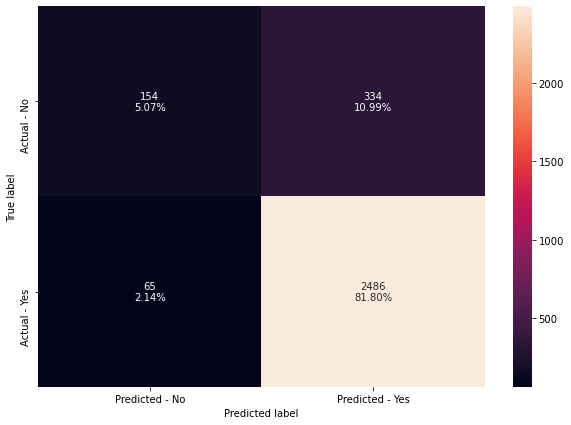

In [87]:
#Calculating different metrics
scores_LR = get_metrics_scores(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)


1. Logistic Regression has given a generalized performance on training and test set.
2. Recall is high, we can try oversampling (increase training data) to see if the model performance can be improved.

## Oversampling train data using SMOTE

In [88]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 5949
Before UpSampling, counts of label 'No': 1139 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 45)
After UpSampling, the shape of train_y: (11898,) 



## Logistic Regression on oversampled data

In [91]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

### Let's evaluate the model performance by using KFold and cross_val_score

K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

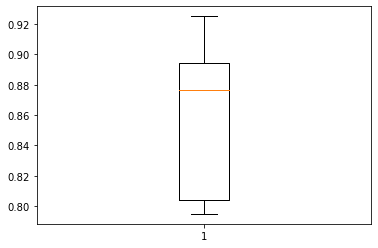

In [92]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

Performance of model on training set varies between 0.80 to 0.92, which is an decline from the previous model
Let's check the performance on the test set.

Accuracy on training set :  0.886535552193646
Accuracy on test set :  0.8371174728529122
Recall on training set :  0.904521768364431
Recall on test set :  0.9125833006664054
Precision on training set :  0.8731137433068311
Precision on test set :  0.8953846153846153


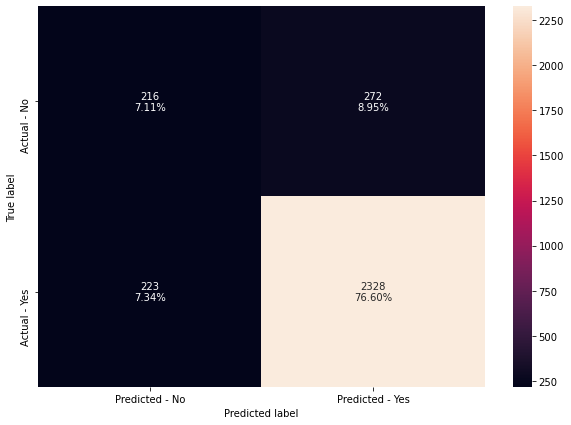

In [93]:
#Calculating different metrics
get_metrics_scores(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

Performance on the training set did not improve.
Lets try

a) Regularization to reduce overfitting the model is not overfitting but we will run regularization to know if the model will improve

b) Undersampling the train to handle the imbalance between classes and check the model performance.

## Regularization¶

In [94]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.6967557572701294
Accuracy on test set :  0.7976307996051333
Recall on training set :  0.8349302403765338
Recall on test set :  0.8439827518620149
Precision on training set :  0.6541551428947715
Precision on test set :  0.9084388185654009


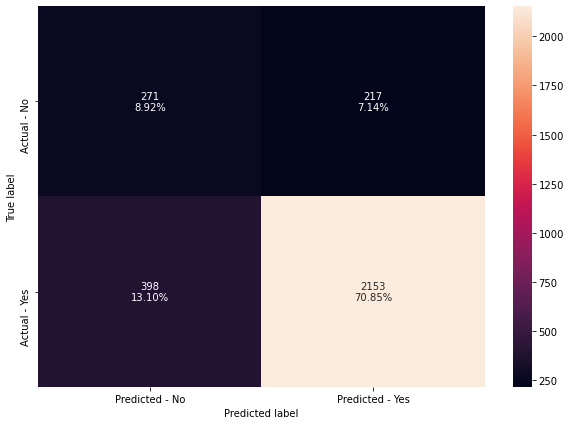

In [95]:
#Calculating different metrics
get_metrics_scores(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

Regularization did not improve the model, recall declined and there is overfitting in the model

## Undersampling train data using SMOTE¶

In [96]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [97]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))


Before Under Sampling, counts of label 'Yes': 5949
Before Under Sampling, counts of label 'No': 1139 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 45)
After Under Sampling, the shape of train_y: (2278,) 



## Logistic Regression on undersampled data

### Let's evaluate the model performance by using KFold and cross_val_score

K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [98]:
log_reg_under = LogisticRegression(random_state = 7)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=7)

### Let's evaluate the model performance by using KFold and cross_val_score

* K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

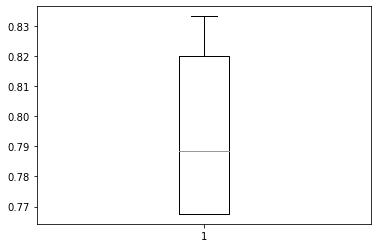

In [99]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

Accuracy on training set :  0.7726075504828798
Accuracy on test set :  0.7759131293188549
Recall on training set :  0.7805092186128183
Recall on test set :  0.7789102312818502
Precision on training set :  0.7683664649956785
Precision on test set :  0.9443916349809885


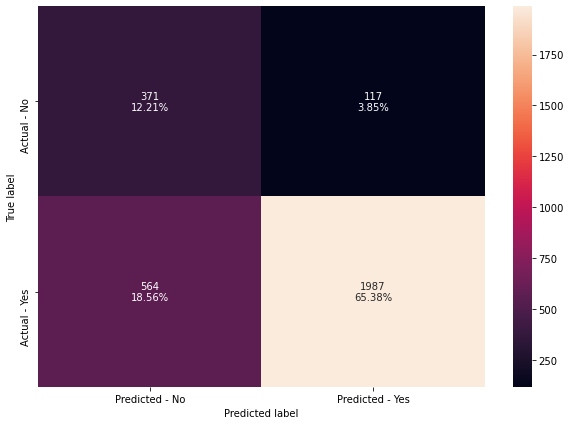

In [100]:
#Calculating different metrics
get_metrics_scores(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

In [101]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_scores(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [102]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_scores(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [103]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_scores(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [104]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression        0.870062   
1            Logistic Regression on Oversampled data        0.886536   
2  Logistic Regression-Regularized (Oversampled d...        0.696756   
3           Logistic Regression on Undersampled data        0.772608   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.868707      0.972096     0.974520         0.884521        0.881560  
1       0.837117      0.904522     0.912583         0.873114        0.895385  
2       0.797631      0.834930     0.843983         0.654155        0.908439  
3       0.775913      0.780509     0.778910         0.768366        0.944392

## Finding the coefficients

In [105]:
log_odds = lr.coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef'])

coef
Customer_Age                   -0.042513
Months_on_book                 -0.008060
Credit_Limit                    0.000300
Total_Revolving_Bal             0.000606
Avg_Open_To_Buy                -0.000305
Total_Trans_Amt                -0.000350
Total_Trans_Ct                  0.084013
Avg_Utilization_Ratio          -0.007638
Gender_M                        0.093074
Dependent_count_1               0.043097
Dependent_count_2              -0.013685
Dependent_count_3              -0.085997
Dependent_count_4              -0.062772
Dependent_count_5              -0.025278
Education_Level_Doctorate      -0.038439
Education_Level_Graduate       -0.010711
Education_Level_High School    -0.012867
Education_Level_Post-Graduate  -0.023278
Education_Level_Uneducated     -0.022240
Marital_Status_Married          0.102952
Marital_Status_Single          -0.168456
Income_Category_$40K - $60K     0.001225
Income_Category_$60K - $80K     0.042208
Income_Category_$80K - $120K    0.007465
Income_Category_Less than $40K -0.153384
Card_Category_Gold             -0.012544
Card_Category_Platinum         -0.002767
Card_Category_Silver           -0.018524
Total_Relationship_Count_2     -0.194274
Total_Relationship_Count_3     -0.019626
Total_Relationship_Count_4      0.076500
Total_Relationship_Count_5      0.071583
Total_Relationship_Count_6      0.114984
Months_Inactive_12_mon_1        0.235453
Months_Inactive_12_mon_2       -0.012698
Months_Inactive_12_mon_3       -0.240463
Months_Inactive_12_mon_4       -0.064105
Months_Inactive_12_mon_5       -0.011605
Months_Inactive_12_mon_6       -0.001634
Contacts_Count_12_mon_1         0.056522
Contacts_Count_12_mon_2         0.095626
Contacts_Count_12_mon_3        -0.175354
Contacts_Count_12_mon_4        -0.081538
Contacts_Count_12_mon_5        -0.024833
Contacts_Count_12_mon_6        -0.059779

### Coefficient interpretations
Coefficient of Marital_Status_Married, Months_Inactive_12_mon_1, Total_Relationship_Count_6,5 and 4, Total_Revolving_Bal, Credit_limit etc increase in these will lead to a decrease in chances of a customers not using the credit card service

### Converting coefficients to odds
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.

* Therefore, odds = exp(b)
* The percentage change in odds is given as odds = (exp(b) - 1) * 100

* Odds from coefficients

In [106]:
odds = np.exp(lr.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
odds      0.958378        0.991973        1.0003             1.000606   

      Avg_Open_To_Buy  Total_Trans_Amt  Total_Trans_Ct  Avg_Utilization_Ratio  \
odds         0.999695          0.99965        1.087643               0.992391   

      Gender_M  Dependent_count_1  Dependent_count_2  Dependent_count_3  \
odds  1.097543           1.044039           0.986409           0.917597   

      Dependent_count_4  Dependent_count_5  Education_Level_Doctorate  \
odds           0.939158           0.975039                    0.96229   

      Education_Level_Graduate  Education_Level_High School  \
odds                  0.989346                     0.987216   

      Education_Level_Post-Graduate  Education_Level_Uneducated  \
odds                       0.976991                    0.978006   

      Marital_Status_Married  Marital_Status_Single  \
odds                1.108438               0.844968   

      Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
odds                     1.001226                     1.043112   

      Income_Category_$80K - $120K  Income_Category_Less than $40K  \
odds                      1.007493                          0.8578   

      Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  \
odds            0.987535                0.997237              0.981647   

      Total_Relationship_Count_2  Total_Relationship_Count_3  \
odds                    0.823433                    0.980566   

      Total_Relationship_Count_4  Total_Relationship_Count_5  \
odds                    1.079502                    1.074207   

      Total_Relationship_Count_6  Months_Inactive_12_mon_1  \
odds                    1.121855                  1.265481   

      Months_Inactive_12_mon_2  Months_Inactive_12_mon_3  \
odds                  0.987382                  0.786264   

      Months_Inactive_12_mon_4  Months_Inactive_12_mon_5  \
odds                  0.937907                  0.988462   

      Months_Inactive_12_mon_6  Contacts_Count_12_mon_1  \
odds                  0.998367                  1.05815   

      Contacts_Count_12_mon_2  Contacts_Count_12_mon_3  \
odds                 1.100348                  0.83916   

      Contacts_Count_12_mon_4  Contacts_Count_12_mon_5  \
odds                 0.921698                 0.975473   

      Contacts_Count_12_mon_6  
odds                 0.941973

In [107]:
perc_change_odds = (np.exp(lr.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
change_odds%     -4.162199       -0.802738      0.030037             0.060569   

              Avg_Open_To_Buy  Total_Trans_Amt  Total_Trans_Ct  \
change_odds%        -0.030513        -0.034956        8.764303   

              Avg_Utilization_Ratio  Gender_M  Dependent_count_1  \
change_odds%              -0.760928  9.754309           4.403901   

              Dependent_count_2  Dependent_count_3  Dependent_count_4  \
change_odds%          -1.359135           -8.24029          -6.084243   

              Dependent_count_5  Education_Level_Doctorate  \
change_odds%          -2.496143                  -3.770984   

              Education_Level_Graduate  Education_Level_High School  \
change_odds%                 -1.065395                    -1.278427   

              Education_Level_Post-Graduate  Education_Level_Uneducated  \
change_odds%                      -2.300937                    -2.19942   

              Marital_Status_Married  Marital_Status_Single  \
change_odds%               10.843787              -15.50318   

              Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
change_odds%                     0.122578                     4.311183   

              Income_Category_$80K - $120K  Income_Category_Less than $40K  \
change_odds%                       0.74927                      -14.220006   

              Card_Category_Gold  Card_Category_Platinum  \
change_odds%            -1.24652               -0.276292   

              Card_Category_Silver  Total_Relationship_Count_2  \
change_odds%             -1.835324                  -17.656742   

              Total_Relationship_Count_3  Total_Relationship_Count_4  \
change_odds%                   -1.943439                    7.950204   

              Total_Relationship_Count_5  Total_Relationship_Count_6  \
change_odds%                     7.42074                     12.1855   

              Months_Inactive_12_mon_1  Months_Inactive_12_mon_2  \
change_odds%                 26.548148                 -1.261806   

              Months_Inactive_12_mon_3  Months_Inactive_12_mon_4  \
change_odds%                -21.373613                 -6.209305   

              Months_Inactive_12_mon_5  Months_Inactive_12_mon_6  \
change_odds%                 -1.153808                 -0.163285   

              Contacts_Count_12_mon_1  Contacts_Count_12_mon_2  \
change_odds%                 5.814982                10.034773   

              Contacts_Count_12_mon_3  Contacts_Count_12_mon_4  \
change_odds%               -16.084001                -7.830211   

              Contacts_Count_12_mon_5  Contacts_Count_12_mon_6  
change_odds%                -2.452677                -5.802723

### Observation:
Customer age: Holding all other features constant a 1 unit change will decrease the odds of a customer age using the credit card service by 0.999695 times or a 4% decrease in odds of of using the other Customer ages credit card service

Months_on_book: The odds of a Months_on_book being a  a customer using the credit card service is 0.958378 times higher than a other Months_on_book or 0.8% higher than other month on the books in the year.



## Hyperparameter Pipeline

In [35]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 96.48694263239358
RF: 98.16777038822258
GBM: 98.1678127937466
ADB: 97.59618632987257
[19:16:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:16:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:16:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the defau

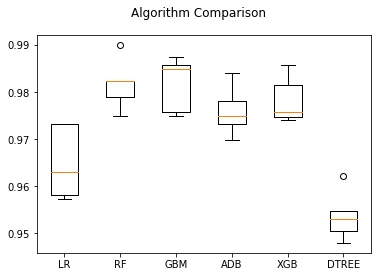

In [36]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that the random forest and gradiant boost is giving the highest cross-validated recall followed by xgboost
- The boxplot shows that the performance of random forest is consistent with just one outlier
- We will tune the best thre models i.e. random forest, gradiant boost and xgboost to see if the performance improves 

In [37]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [38]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Hyperparameter tuning using grid search

## GridSearchCV

In [40]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Grid of parameters to choose from
param_grid = {'randomforestclassifier__max_depth':[5,10,15,20,25],
              'randomforestclassifier__max_features': ['sqrt', 'log2', None],
              'randomforestclassifier__min_samples_leaf':[1,2,3,4,5],
              'randomforestclassifier__n_estimators': range(25,30,1)
              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 26} 
Score: 0.993108112883505


In [41]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1, n_estimators=27, max_depth=5,max_features= 'log2', min_samples_leaf=3),
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features='log2',
                                        min_samples_leaf=3, n_estimators=27,
                                        random_state=1))])

Accuracy on training set :  0.8961625282167043
Accuracy on test set :  0.8933859822309971
Recall on training set :  0.9932761808707345
Recall on test set :  0.9894159153273226
Precision on training set :  0.8946252838758516
Precision on test set :  0.8947181850407657


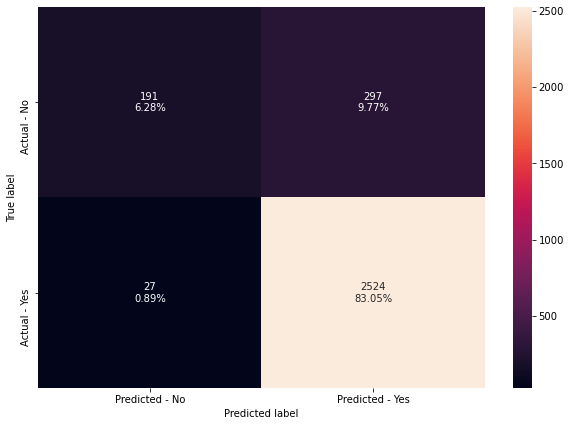

In [42]:
# Calculating different metrics
get_metrics_score(rf_tuned1)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

- Recall is the highest matrix with no overfitting.
- The overall model has no overfitting.

## RandomizedSearchCV

In [43]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Grid of parameters to choose from
param_grid = {'randomforestclassifier__max_depth':[5,10,15,20,25],
              'randomforestclassifier__max_features': ['sqrt', 'log2', None],
              'randomforestclassifier__min_samples_leaf':[1,2,3,4,5],
              'randomforestclassifier__n_estimators': range(25,30,1)
              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 26} 
Score: 0.993108112883505


In [44]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=1, n_estimators=27, max_depth=5,max_features= 'log2', min_samples_leaf=3),
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features='log2',
                                        min_samples_leaf=3, n_estimators=27,
                                        random_state=1))])

Accuracy on training set :  0.8961625282167043
Accuracy on test set :  0.8933859822309971
Recall on training set :  0.9932761808707345
Recall on test set :  0.9894159153273226
Precision on training set :  0.8946252838758516
Precision on test set :  0.8947181850407657


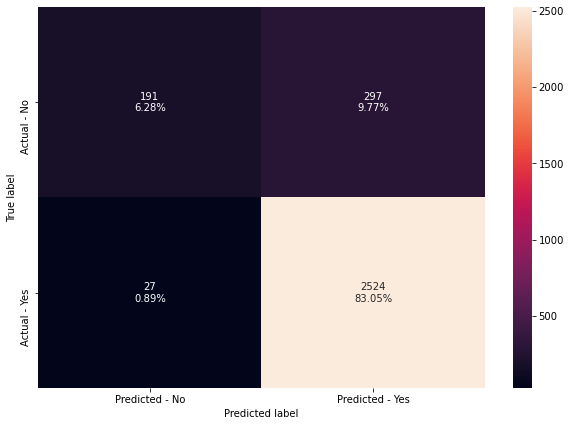

In [45]:
# Calculating different metrics
get_metrics_score(rf_tuned2)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

1. There is no improvement from the previous model
2. Recall is a minimal or negelible overfitting

## XGBoost

## GridSearchCV

In [110]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.8} with CV score=0.9978148433469267:


In [111]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=3,
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

[08:17:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8837471783295711
Accuracy on test set :  0.8772622573214873
Recall on training set :  1.0
Recall on test set :  0.9992159937279498
Precision on training set :  0.8783404695112949
Precision on test set :  0.8729452054794521


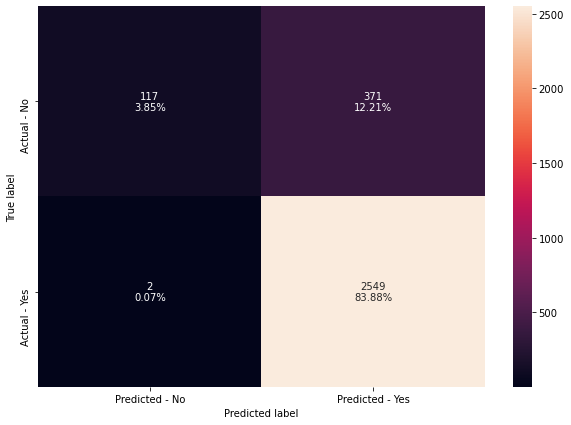

In [48]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

1. Recall has improved compared to decision tree RandomsearchCV and Gridsearch CV
2. There is a slight overfitting in the recall training data

## RandomizedSearchCV

In [49]:
#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

[23:01:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [50]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=20,
                scale_pos_weight=10,
                learning_rate=0.01,
                gamma=1,
                subsample=0.9,
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

[23:08:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=1, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8906602708803611
Accuracy on test set :  0.8845014807502468
Recall on training set :  0.9996638090435367
Recall on test set :  0.9976479811838495
Precision on training set :  0.8849702380952381
Precision on test set :  0.8806228373702422


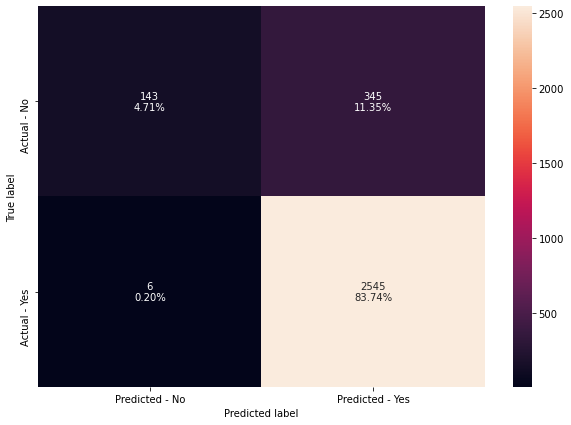

In [51]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

1. Recall has slighly declined from Grid search Cv but there is no overfitting in the model.
2. Very sligh improvement in the precision.

## Gradient Boosting

## GridSearchCV

In [53]:
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Grid of parameters to choose from
param_grid = {'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2, 0.05],
              'gradientboostingclassifier__subsample': [0.7, 0.8, 0.9, 1],
              'gradientboostingclassifier__n_estimators': range(25,30,1)
              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__n_estimators': 25, 'gradientboostingclassifier__subsample': 0.7} 
Score: 1.0


In [54]:
gb_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=1, n_estimators=25, subsample=0.7,learning_rate= 0.01),
)

# Fit the model on training data
gb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, n_estimators=25,
                                            random_state=1, subsample=0.7))])

Accuracy on training set :  0.8393058690744921
Accuracy on test set :  0.8394208621256992
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8393058690744921
Precision on test set :  0.8394208621256992


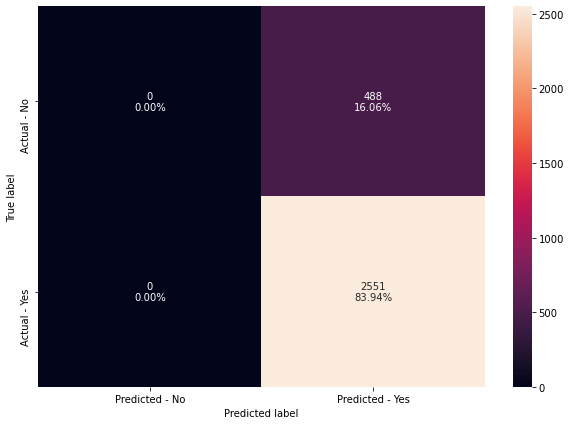

In [56]:
# Calculating different metrics
get_metrics_score(gb_tuned1)

# Creating confusion matrix
make_confusion_matrix(gb_tuned1, y_test)

1. Recall has improved from xgboost and randomforest with no overfitting
2. Precision declined but there is no overfitting in the model

## Randomized SearchCV

In [55]:
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Grid of parameters to choose from
param_grid = {'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2, 0.05],
              'gradientboostingclassifier__subsample': [0.7, 0.8, 0.9, 1],
              'gradientboostingclassifier__n_estimators': range(25,30,1)
              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__n_estimators': 25, 'gradientboostingclassifier__subsample': 0.7} 
Score: 1.0


In [57]:
# Creating new pipeline with best parameters
gb_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=1, n_estimators=27, max_depth=5,max_features= 'log2', min_samples_leaf=3),
)

# Fit the model on training data
gb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, max_features='log2',
                                            min_samples_leaf=3, n_estimators=27,
                                            random_state=1))])

Accuracy on training set :  0.9298814898419865
Accuracy on test set :  0.9147745969068772
Recall on training set :  0.989409984871407
Recall on test set :  0.9827518620148962
Precision on training set :  0.9313291139240506
Precision on test set :  0.9210139603232917


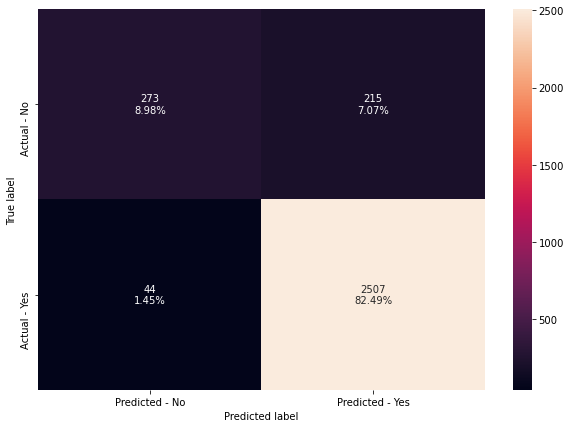

In [58]:
# Calculating different metrics
get_metrics_score(gb_tuned2)

# Creating confusion matrix
make_confusion_matrix(gb_tuned2, y_test)

1. Recall had a slight decline with no overfitting
2. Precision had an increase in the model with no overfitting

In [59]:
# defining list of models
models = [xgb_tuned1, xgb_tuned2, gb_tuned1, gb_tuned2, rf_tuned1, rf_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [60]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "XGBoost tuned with GridSearchCV",
            "XGBoost tuned with RandomizedSearchCV",
            "Gradient tuned tuned with GridSearchCV",
            "Gradient tuned tuned with RandomizedSearchCV",
            "RandomForest tuned tuned with GridSearchCV",
            "RandomForest tuned tuned with RandomizedSearchCV"
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  \
2            Gradient tuned tuned with GridSearchCV        0.839306   
0                   XGBoost tuned with GridSearchCV        0.883747   
1             XGBoost tuned with RandomizedSearchCV        0.890660   
4        RandomForest tuned tuned with GridSearchCV        0.896163   
5  RandomForest tuned tuned with RandomizedSearchCV        0.896163   
3      Gradient tuned tuned with RandomizedSearchCV        0.929881   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
2       0.839421      1.000000     1.000000         0.839306        0.839421  
0       0.877262      1.000000     0.999216         0.878340        0.872945  
1       0.884501      0.999664     0.997648         0.884970        0.880623  
4       0.893386      0.993276     0.989416         0.894625        0.894718  
5       0.893386      0.993276     0.989416         0.894625        0.894718  
3       0.914775      0.989410     0.982752         0.931329        0.921014

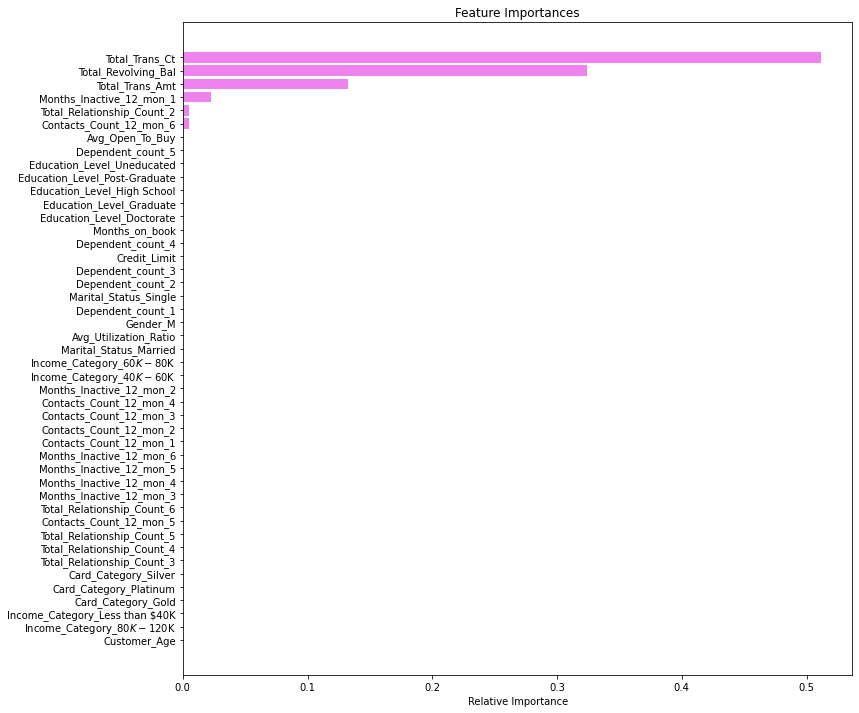

In [63]:
feature_names = X_train.columns
importances = gb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()